In [1]:
#!pip install census

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import json
import scipy.stats as st

#Census API Key
api_key = "148b3af77c97878b7d780e5ad789963d1c0b60cf"
    
c = Census(api_key, year = 2019)

In [2]:
#Load in csv
#used_string = r"C:\Users\ramir\Documents\COVID19\COVID19\Bexar_County_COVID-19_Data_by_Zip_Code.csv"
used_string = r"Bexar_County_COVID-19_Data_by_Zip_Code.csv"
bexar_df = pd.read_csv(used_string)
bexar_df.head()

,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546
1,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922
4,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147


In [3]:
#Load in API data
census_data = c.acs5.get(("NAME", "B01001_001E", "B01001_002E", "B01001_003E", "B01001_004E", "B01001_005E", "B01001_006E",
                          "B01001_007E", "B01001_008E", "B01001_009E", "B01001_010E", "B01001_011E", "B01001_012E",
                          "B01001_013E", "B01001_014E", "B01001_015E", "B01001_016E", "B01001_017E", "B01001_018E",
                          "B01001_019E", "B01001_020E", "B01001_021E", "B01001_022E", "B01001_023E", "B01001_024E",
                          "B01001_025E", "B01001_026E", "B01001_027E", "B01001_028E", "B01001_029E", "B01001_030E",
                          "B01001_031E", "B01001_032E", "B01001_033E", "B01001_034E", "B01001_035E", "B01001_036E",
                          "B01001_037E", "B01001_038E", "B01001_039E", "B01001_040E", "B01001_041E", "B01001_042E",
                          "B01001_043E", "B01001_044E", "B01001_045E", "B01001_046E", "B01001_047E", "B01001_048E",
                          "B01001_049E"), {"for":"zip code tabulation area:*"})

#Convert to dataframe
census_df = pd.DataFrame(census_data)

#Column Reordering
census_df = census_df.rename(columns = {"B01001_001E" : "Total", "B01001_002E" : "Total Male",
                                        "B01001_026E" : "Total Female", "B01001_003E" : "Male : Under 5 Years",
                                        "B01001_027E" : "Female : Under 5 Years", "B01001_004E" : "Male : 5 to 9 Years",
                                        "B01001_028E" : "Female : 5 to 9 Years", "B01001_005E" : "Male : 10 to 14 Years",
                                        "B01001_029E" : "Female : 10 to 14 Years", "B01001_006E" : "Male : 15 to 17 Years",
                                        "B01001_030E" : "Female : 15 to 17 Years", "B01001_007E" : "Male : 18 and 19 Years",
                                        "B01001_031E" : "Female : 18 and 19 Years", "B01001_008E" : "Male : 20 Years",
                                        "B01001_032E" : "Female : 20 Years", "B01001_009E" : "Male : 21 Years",
                                        "B01001_033E" : "Female : 21 Years", "B01001_010E" : "Male : 22 to 24 Years",
                                        "B01001_034E" : "Female : 22 to 24 Years", "B01001_011E" : "Male : 25 to 29 Years",
                                        "B01001_035E" : "Female : 25 to 29 Years", "B01001_012E" : "Male : 30 to 34 Years",
                                        "B01001_036E" : "Female : 30 to 34 Years", "B01001_013E" : "Male : 35 to 39 Years",
                                        "B01001_037E" : "Female : 35 to 39 Years", "B01001_014E" : "Male : 40 to 44 Years",
                                        "B01001_038E" : "Female : 40 to 44 Years", "B01001_015E" : "Male : 45 to 49 Years",
                                        "B01001_039E" : "Female : 45 to 49 Years", "B01001_016E" : "Male : 50 to 54 Years",
                                        "B01001_040E" : "Female : 50 to 54 Years", "B01001_017E" : "Male : 55 to 59 Years",
                                        "B01001_041E" : "Female : 55 to 59 Years", "B01001_018E" : "Male : 60 and 61 Years",
                                        "B01001_042E" : "Female : 60 to 61 Years", "B01001_019E" : "Male : 62 to 64 Years",
                                        "B01001_043E" : "Female : 62 to 64 Years", "B01001_020E" : "Male : 65 and 66 Years",
                                        "B01001_044E" : "Female : 65 and 66 Years", "B01001_021E" : "Male : 67 to 69 Years",
                                        "B01001_045E" : "Female : 67 to 69 Years", "B01001_022E" : "Male : 70 to 74 Years",
                                        "B01001_046E" : "Female : 70 to 74 Years", "B01001_023E" : "Male : 75 to 79 Years",
                                        "B01001_047E" : "Female : 75 to 79 Years", "B01001_024E" : "Male : 80 to 84 Years",
                                        "B01001_048E" : "Female : 80 to 84 Years", "B01001_025E" : "Male : 85 Years and Over",
                                        "B01001_049E" : "Female : 85 Years and Over", "NAME": "Name",
                                        "zip code tabulation area" : "ZIP_CODE"})

##Final Dataframe
census_df = census_df[["ZIP_CODE", "Total", "Total Male", "Total Female", "Male : Under 5 Years", "Female : Under 5 Years", "Male : 5 to 9 Years", "Female : 5 to 9 Years",
                      "Male : 10 to 14 Years", "Female : 10 to 14 Years", "Male : 15 to 17 Years", "Female : 15 to 17 Years", "Male : 18 and 19 Years", "Female : 18 and 19 Years",
                      "Male : 20 Years", "Female : 20 Years", "Male : 21 Years", "Female : 21 Years", "Male : 22 to 24 Years",
                      "Female : 22 to 24 Years", "Male : 25 to 29 Years", "Female : 25 to 29 Years", "Male : 30 to 34 Years",
                      "Female : 30 to 34 Years", "Male : 35 to 39 Years", "Female : 35 to 39 Years", "Male : 40 to 44 Years",
                      "Female : 40 to 44 Years", "Male : 45 to 49 Years", "Female : 45 to 49 Years", "Male : 50 to 54 Years",
                      "Female : 50 to 54 Years", "Male : 55 to 59 Years", "Female : 55 to 59 Years", "Male : 60 and 61 Years",
                      "Female : 60 to 61 Years", "Male : 62 to 64 Years", "Female : 62 to 64 Years", "Male : 65 and 66 Years",
                      "Female : 65 and 66 Years", "Male : 67 to 69 Years", "Female : 67 to 69 Years", "Male : 70 to 74 Years",
                      "Female : 70 to 74 Years", "Male : 75 to 79 Years", "Female : 75 to 79 Years", "Male : 80 to 84 Years",
                      "Female : 80 to 84 Years", "Male : 85 Years and Over", "Female : 85 Years and Over"]]
#Visualize
pd.DataFrame(census_df)


,ZIP_CODE,Total,Total Male,Total Female,Male : Under 5 Years,Female : Under 5 Years,Male : 5 to 9 Years,Female : 5 to 9 Years,Male : 10 to 14 Years,Female : 10 to 14 Years,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
0,00601,17113.0,8533.0,8580.0,596.0,207.0,434.0,401.0,640.0,630.0,...,330.0,310.0,252.0,402.0,296.0,286.0,161.0,232.0,138.0,206.0
1,00602,37751.0,18488.0,19263.0,785.0,707.0,1183.0,886.0,826.0,1105.0,...,592.0,644.0,865.0,1078.0,765.0,703.0,237.0,529.0,237.0,254.0
2,00603,47081.0,23120.0,23961.0,1024.0,1038.0,1241.0,1021.0,1507.0,1610.0,...,867.0,1071.0,1345.0,1444.0,1108.0,926.0,523.0,837.0,250.0,515.0
3,00606,6392.0,3201.0,3191.0,143.0,132.0,140.0,159.0,194.0,174.0,...,118.0,128.0,238.0,153.0,75.0,59.0,24.0,74.0,118.0,154.0
4,00610,26686.0,12920.0,13766.0,515.0,513.0,723.0,620.0,805.0,797.0,...,601.0,599.0,546.0,722.0,540.0,724.0,319.0,301.0,106.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,99923,14.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33116,99925,908.0,520.0,388.0,43.0,24.0,24.0,20.0,47.0,17.0,...,19.0,15.0,10.0,29.0,11.0,7.0,14.0,2.0,3.0,5.0
33117,99926,1654.0,885.0,769.0,45.0,38.0,78.0,44.0,82.0,103.0,...,31.0,5.0,30.0,43.0,16.0,10.0,9.0,4.0,0.0,11.0
33118,99927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
census_df["ZIP_CODE"] = census_df["ZIP_CODE"].astype(str).astype(int)

In [5]:
merge_df = pd.merge(bexar_df, census_df, on = "ZIP_CODE", how = "left")
merge_df


,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546,...,20.0,61.0,118.0,145.0,120.0,54.0,19.0,53.0,106.0,44.0
1,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416,...,603.0,571.0,992.0,1180.0,548.0,652.0,293.0,298.0,368.0,716.0
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312,...,431.0,189.0,426.0,399.0,248.0,348.0,221.0,107.0,15.0,59.0
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922,...,460.0,685.0,481.0,524.0,276.0,330.0,286.0,300.0,128.0,133.0
4,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147,...,49.0,138.0,164.0,189.0,86.0,78.0,41.0,46.0,94.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,82,78260,36255,2654,7180.735931,78260,17,45.995671,0.407156,0.005818,...,370.0,357.0,469.0,382.0,280.0,244.0,76.0,128.0,82.0,54.0
72,83,78261,23828,1836,7514.427209,78261,13,53.206729,0.474302,0.006743,...,185.0,160.0,184.0,248.0,61.0,82.0,51.0,51.0,10.0,75.0
73,84,78263,5228,428,8302.618817,78263,1,19.398642,0.680812,0.010405,...,89.0,89.0,34.0,78.0,58.0,42.0,18.0,49.0,26.0,60.0
74,85,78264,13113,1439,10995.644530,78264,13,99.335218,0.726860,0.016811,...,186.0,99.0,143.0,141.0,40.0,29.0,37.0,44.0,15.0,12.0


In [6]:
# Save dataframe to excel file to easily scroll through all columns
merge_df.to_excel("AgeDataByZipCode.xlsx")

In [7]:
# To reduce the effects of different population sizes for each county, counts for each age group are converted to percentages
age_percentage = merge_df.copy()


display(age_percentage)
age_columns = ["Total Male", "Total Female", "Male : Under 5 Years", "Female : Under 5 Years", "Male : 5 to 9 Years", "Female : 5 to 9 Years",
                      "Male : 10 to 14 Years", "Female : 10 to 14 Years", "Male : 15 to 17 Years", "Female : 15 to 17 Years", "Male : 18 and 19 Years", "Female : 18 and 19 Years",
                      "Male : 20 Years", "Female : 20 Years", "Male : 21 Years", "Female : 21 Years", "Male : 22 to 24 Years",
                      "Female : 22 to 24 Years", "Male : 25 to 29 Years", "Female : 25 to 29 Years", "Male : 30 to 34 Years",
                      "Female : 30 to 34 Years", "Male : 35 to 39 Years", "Female : 35 to 39 Years", "Male : 40 to 44 Years",
                      "Female : 40 to 44 Years", "Male : 45 to 49 Years", "Female : 45 to 49 Years", "Male : 50 to 54 Years",
                      "Female : 50 to 54 Years", "Male : 55 to 59 Years", "Female : 55 to 59 Years", "Male : 60 and 61 Years",
                      "Female : 60 to 61 Years", "Male : 62 to 64 Years", "Female : 62 to 64 Years", "Male : 65 and 66 Years",
                      "Female : 65 and 66 Years", "Male : 67 to 69 Years", "Female : 67 to 69 Years", "Male : 70 to 74 Years",
                      "Female : 70 to 74 Years", "Male : 75 to 79 Years", "Female : 75 to 79 Years", "Male : 80 to 84 Years",
                      "Female : 80 to 84 Years", "Male : 85 Years and Over", "Female : 85 Years and Over"]
for header in age_columns:
    age_percentage[header] = (age_percentage[header]/age_percentage["Total"])*100
display(age_percentage)    

,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546,...,20.0,61.0,118.0,145.0,120.0,54.0,19.0,53.0,106.0,44.0
1,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416,...,603.0,571.0,992.0,1180.0,548.0,652.0,293.0,298.0,368.0,716.0
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312,...,431.0,189.0,426.0,399.0,248.0,348.0,221.0,107.0,15.0,59.0
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922,...,460.0,685.0,481.0,524.0,276.0,330.0,286.0,300.0,128.0,133.0
4,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147,...,49.0,138.0,164.0,189.0,86.0,78.0,41.0,46.0,94.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,82,78260,36255,2654,7180.735931,78260,17,45.995671,0.407156,0.005818,...,370.0,357.0,469.0,382.0,280.0,244.0,76.0,128.0,82.0,54.0
72,83,78261,23828,1836,7514.427209,78261,13,53.206729,0.474302,0.006743,...,185.0,160.0,184.0,248.0,61.0,82.0,51.0,51.0,10.0,75.0
73,84,78263,5228,428,8302.618817,78263,1,19.398642,0.680812,0.010405,...,89.0,89.0,34.0,78.0,58.0,42.0,18.0,49.0,26.0,60.0
74,85,78264,13113,1439,10995.644530,78264,13,99.335218,0.726860,0.016811,...,186.0,99.0,143.0,141.0,40.0,29.0,37.0,44.0,15.0,12.0


,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546,...,0.292697,0.892726,1.726914,2.122055,1.756183,0.790282,0.278062,0.775648,1.551295,0.643934
1,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416,...,1.672398,1.583648,2.751276,3.272687,1.519858,1.808298,0.812625,0.826492,1.020635,1.985800
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312,...,2.725950,1.195370,2.694327,2.523560,1.568528,2.200999,1.397761,0.676744,0.094871,0.373158
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922,...,1.466977,2.184520,1.533948,1.671078,0.880186,1.052397,0.912077,0.956724,0.408202,0.424148
4,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147,...,0.723888,2.038706,2.422810,2.792141,1.270498,1.152312,0.605702,0.679569,1.388684,1.403457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,82,78260,36255,2654,7180.735931,78260,17,45.995671,0.407156,0.005818,...,1.406791,1.357363,1.783202,1.452416,1.064598,0.927721,0.288962,0.486674,0.311775,0.205315
72,83,78261,23828,1836,7514.427209,78261,13,53.206729,0.474302,0.006743,...,1.104544,0.955281,1.098573,1.480685,0.364201,0.489581,0.304496,0.304496,0.059705,0.447788
73,84,78263,5228,428,8302.618817,78263,1,19.398642,0.680812,0.010405,...,2.004505,2.004505,0.765766,1.756757,1.306306,0.945946,0.405405,1.103604,0.585586,1.351351
74,85,78264,13113,1439,10995.644530,78264,13,99.335218,0.726860,0.016811,...,1.750918,0.931940,1.346136,1.327309,0.376541,0.272993,0.348301,0.414196,0.141203,0.112962


In [8]:
#Find outlier zipcode
age_percentage_outlier = age_percentage.copy()[age_percentage["Total Male"] >99]
display(age_percentage_outlier)
display(age_percentage.index)

,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
13,22,78150,294,9,3169.014085,78150,0,0.0,0.253048,0.000889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75],
           dtype='int64')

In [9]:
#Outlier zipcode is 78150. This is JBSA. Should we drop this? The index for this zipcode is 13

age_percentage = age_percentage.drop(13)
display(age_percentage)

,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546,...,0.292697,0.892726,1.726914,2.122055,1.756183,0.790282,0.278062,0.775648,1.551295,0.643934
1,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416,...,1.672398,1.583648,2.751276,3.272687,1.519858,1.808298,0.812625,0.826492,1.020635,1.985800
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312,...,2.725950,1.195370,2.694327,2.523560,1.568528,2.200999,1.397761,0.676744,0.094871,0.373158
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922,...,1.466977,2.184520,1.533948,1.671078,0.880186,1.052397,0.912077,0.956724,0.408202,0.424148
4,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147,...,0.723888,2.038706,2.422810,2.792141,1.270498,1.152312,0.605702,0.679569,1.388684,1.403457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,82,78260,36255,2654,7180.735931,78260,17,45.995671,0.407156,0.005818,...,1.406791,1.357363,1.783202,1.452416,1.064598,0.927721,0.288962,0.486674,0.311775,0.205315
72,83,78261,23828,1836,7514.427209,78261,13,53.206729,0.474302,0.006743,...,1.104544,0.955281,1.098573,1.480685,0.364201,0.489581,0.304496,0.304496,0.059705,0.447788
73,84,78263,5228,428,8302.618817,78263,1,19.398642,0.680812,0.010405,...,2.004505,2.004505,0.765766,1.756757,1.306306,0.945946,0.405405,1.103604,0.585586,1.351351
74,85,78264,13113,1439,10995.644530,78264,13,99.335218,0.726860,0.016811,...,1.750918,0.931940,1.346136,1.327309,0.376541,0.272993,0.348301,0.414196,0.141203,0.112962


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


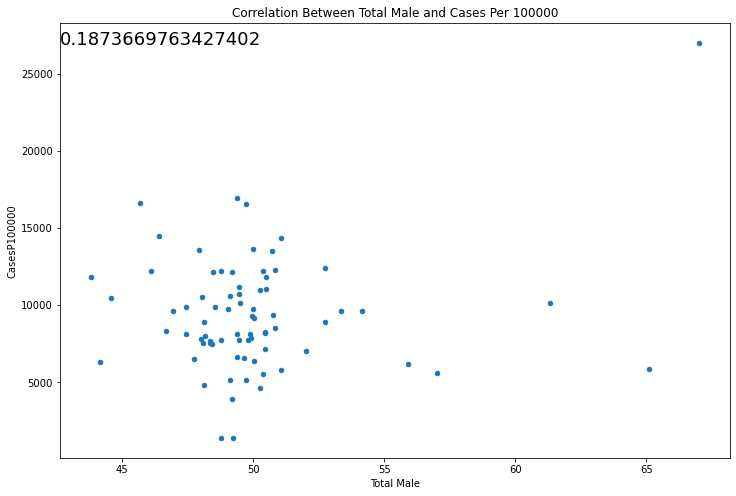

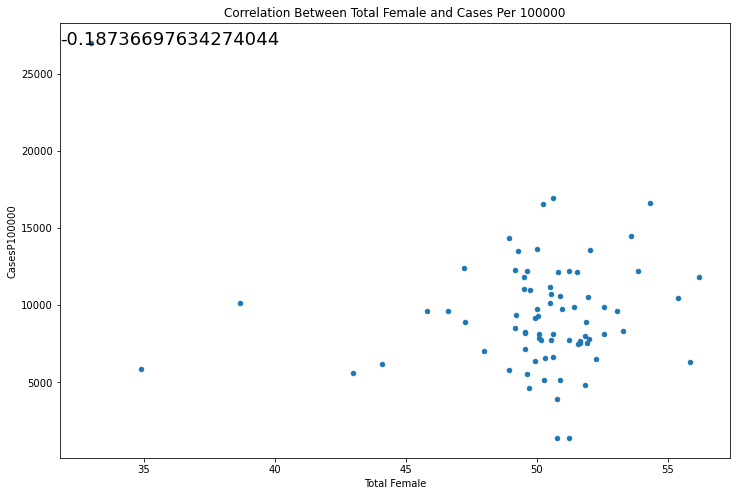

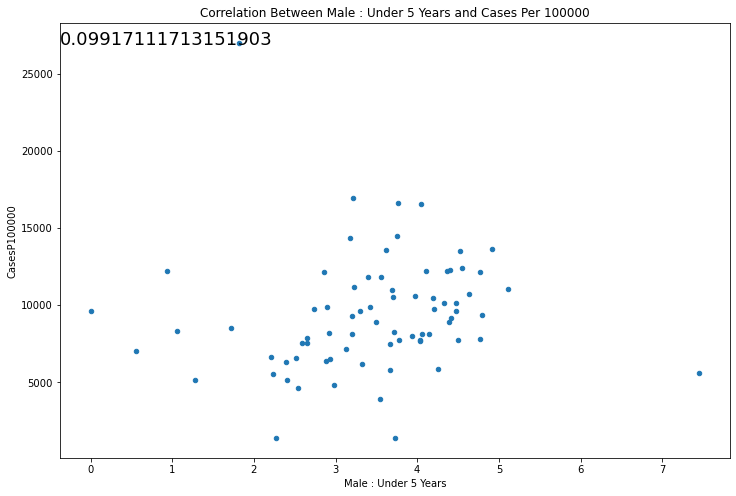

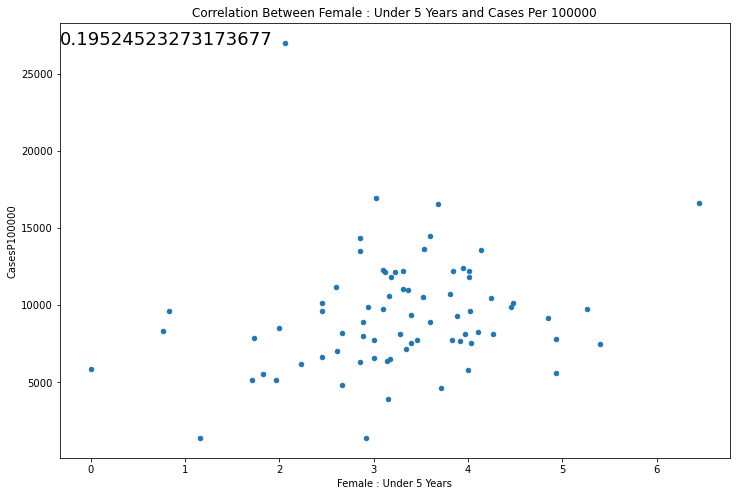

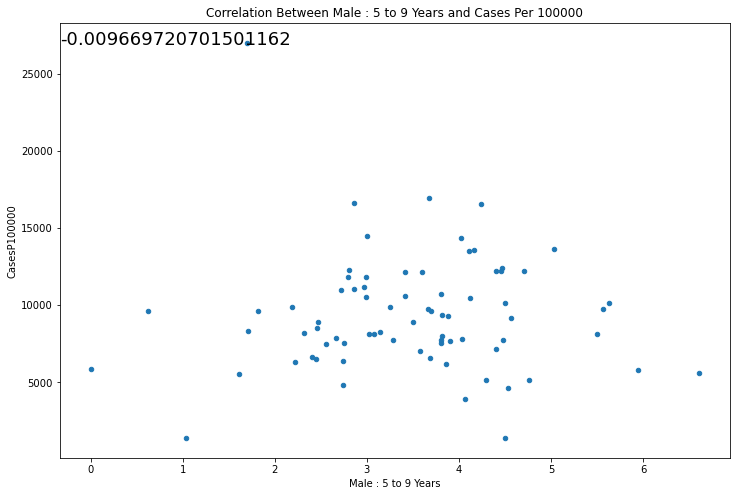

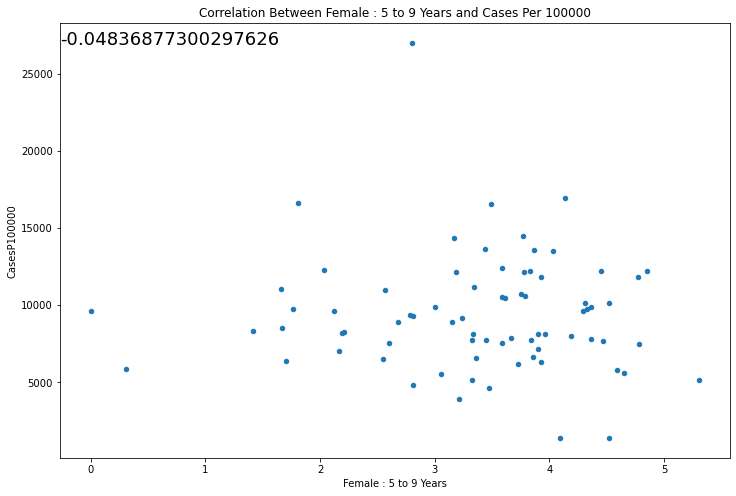

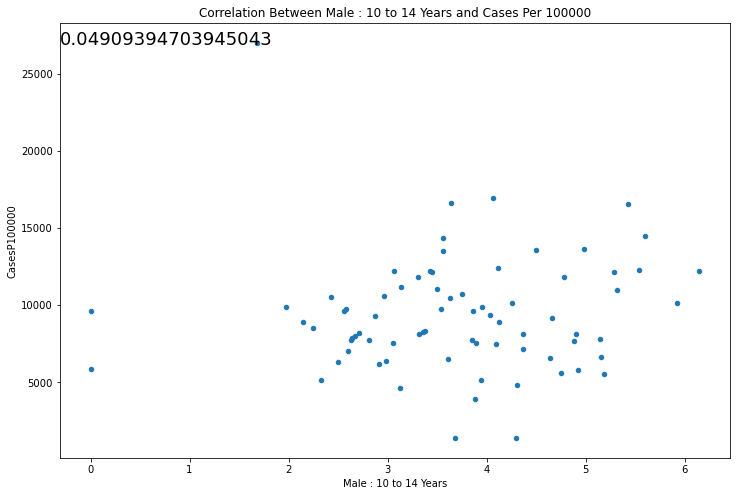

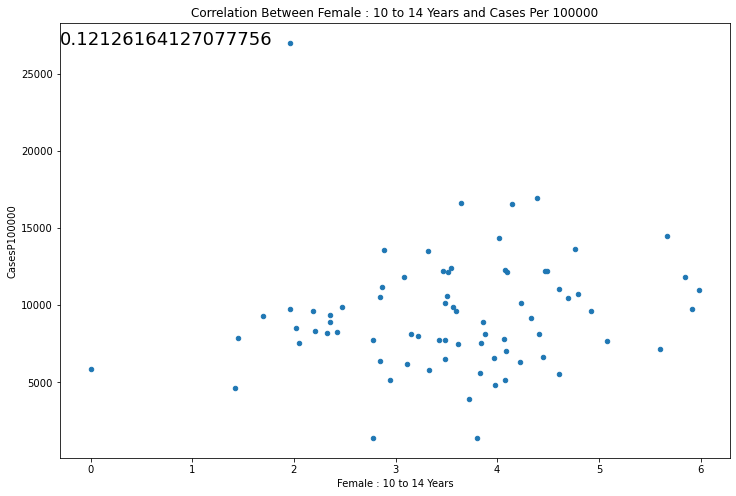

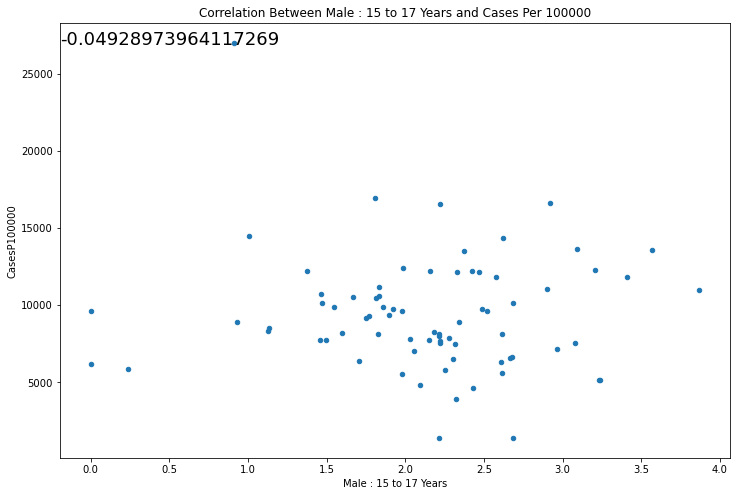

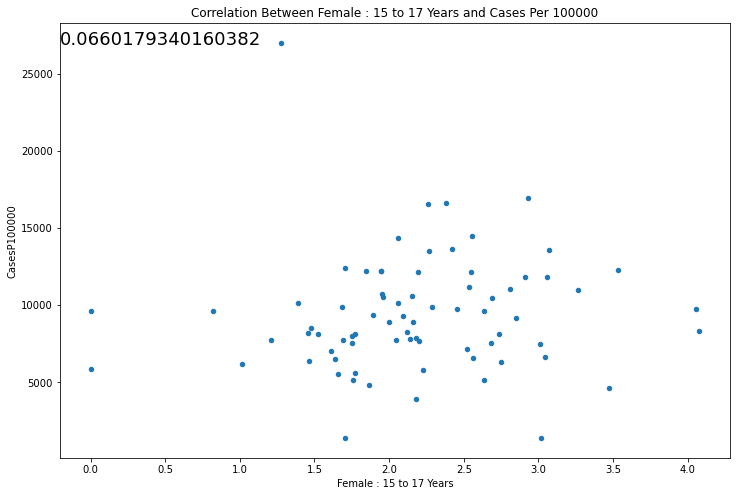

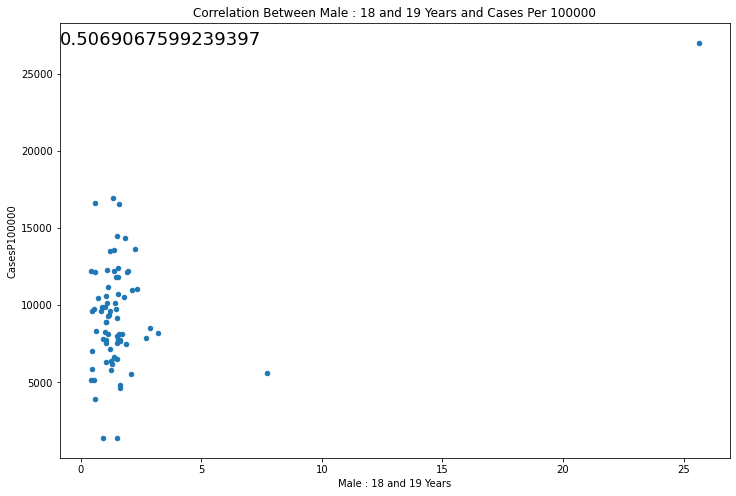

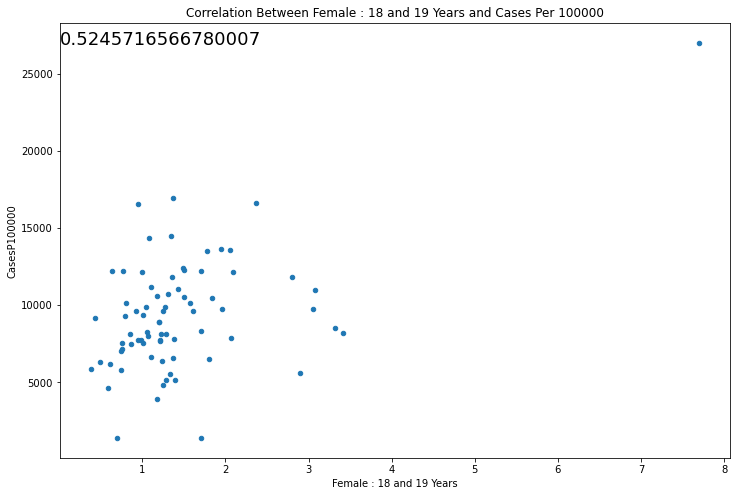

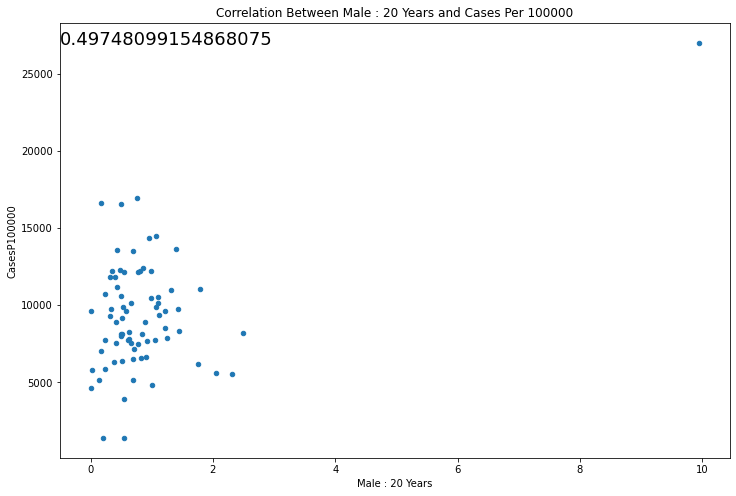

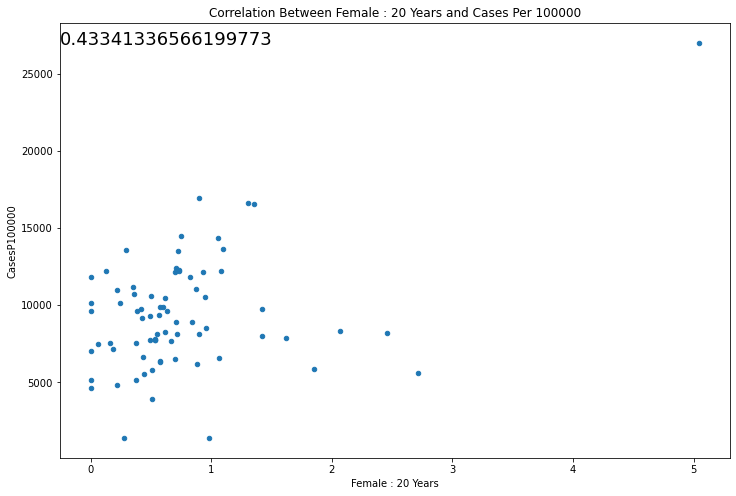

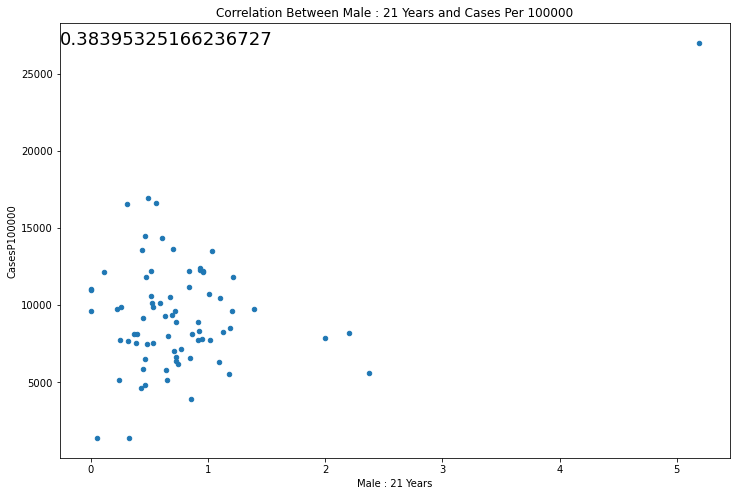

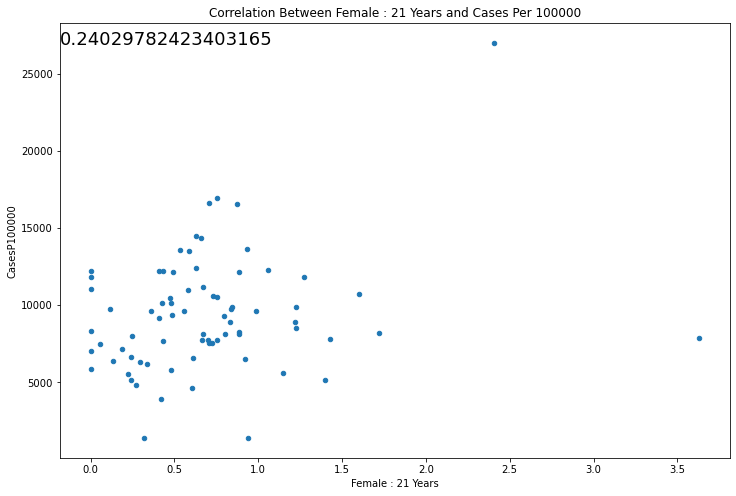

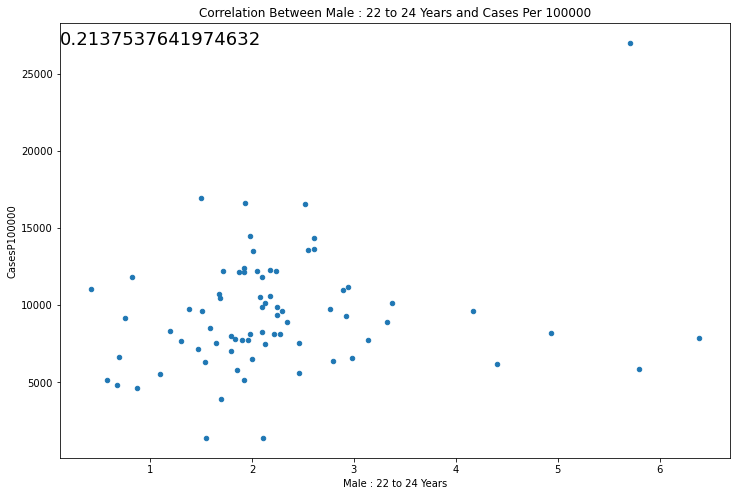

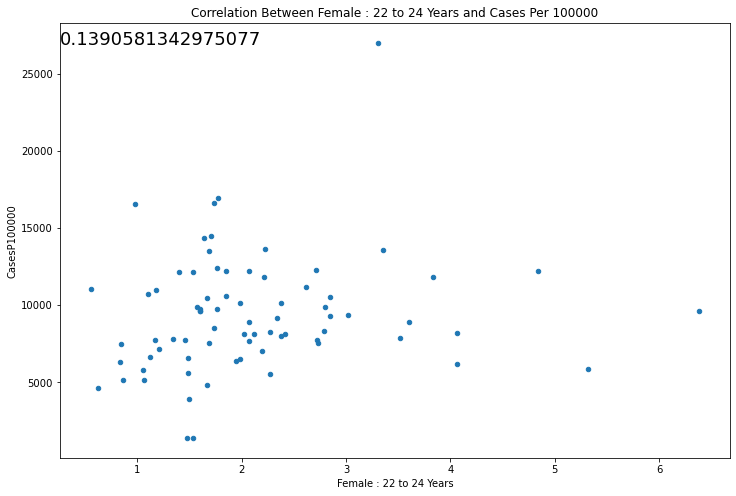

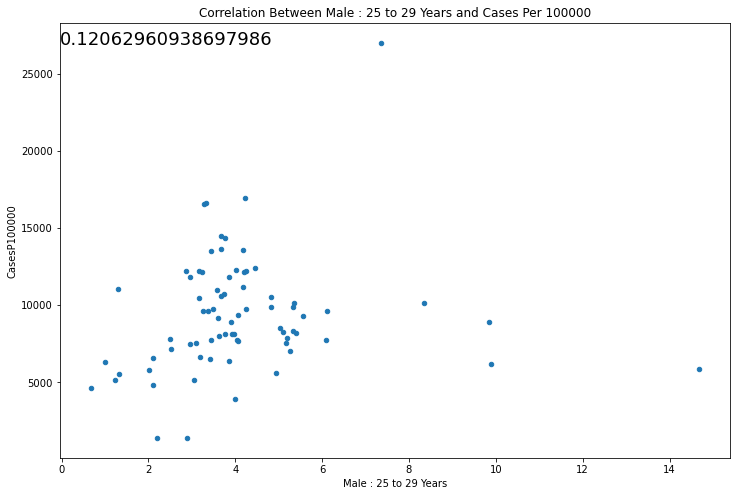

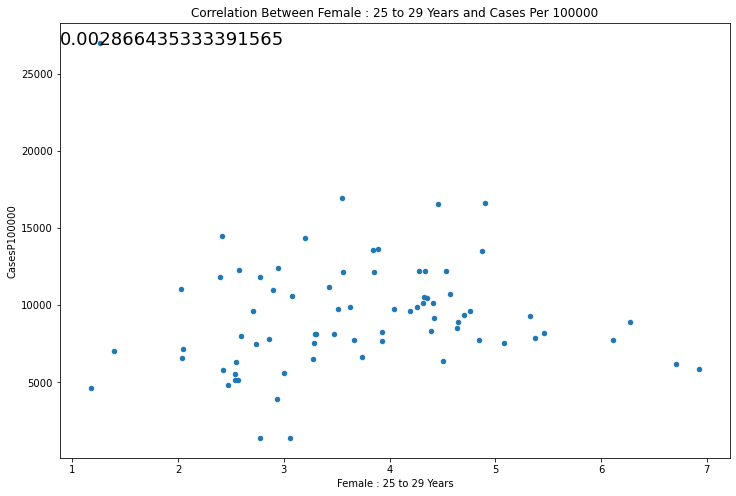

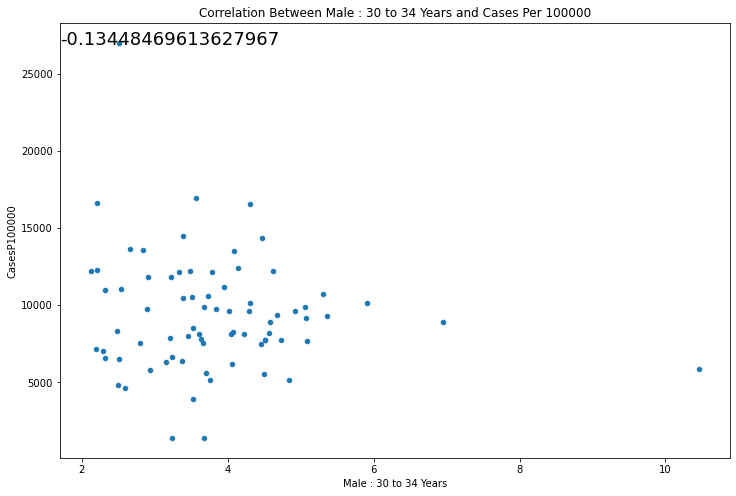

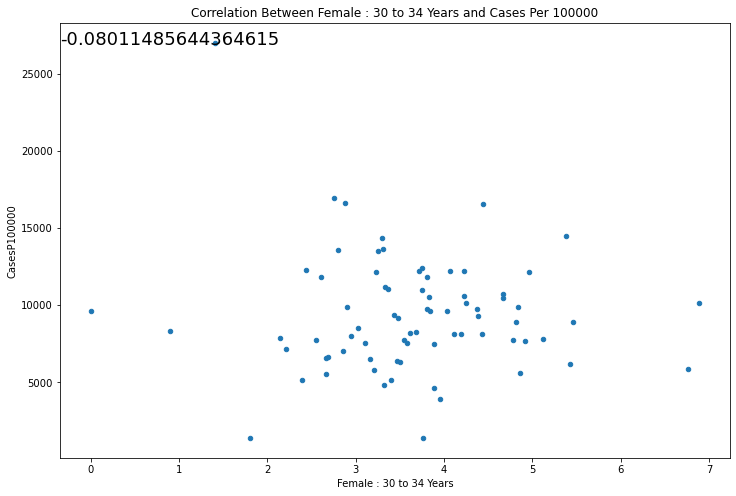

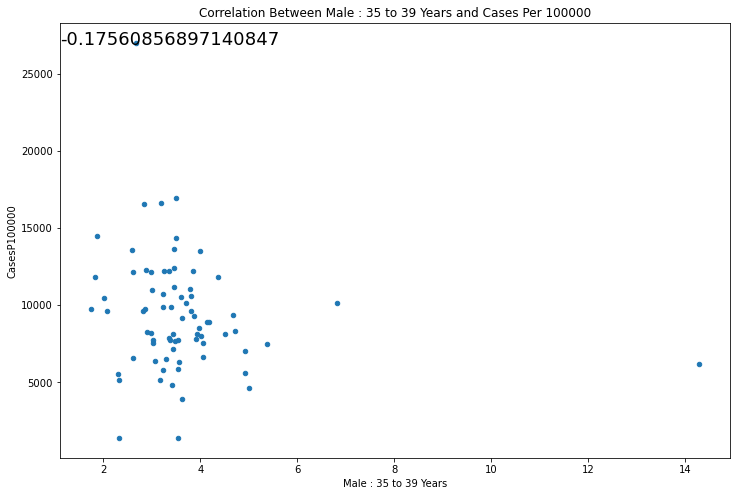

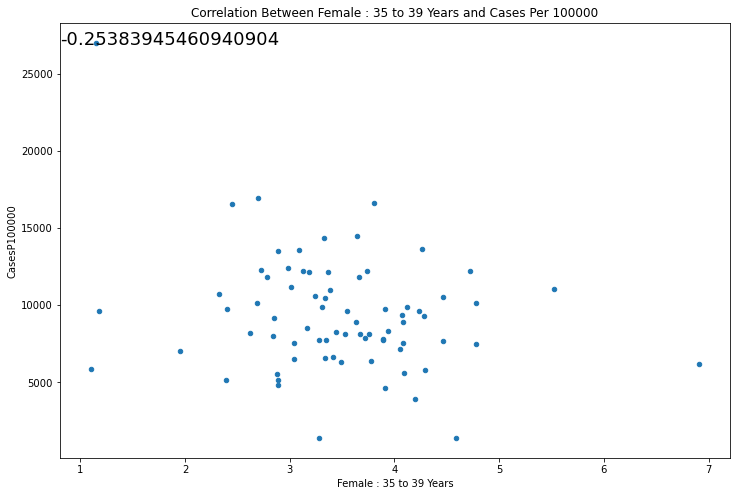

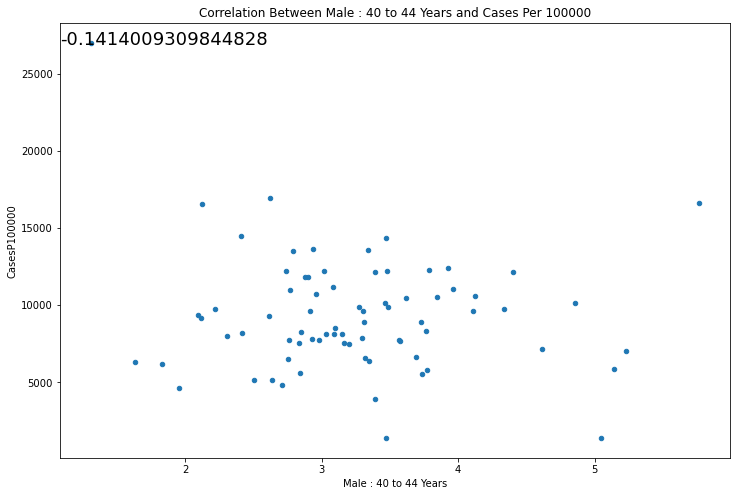

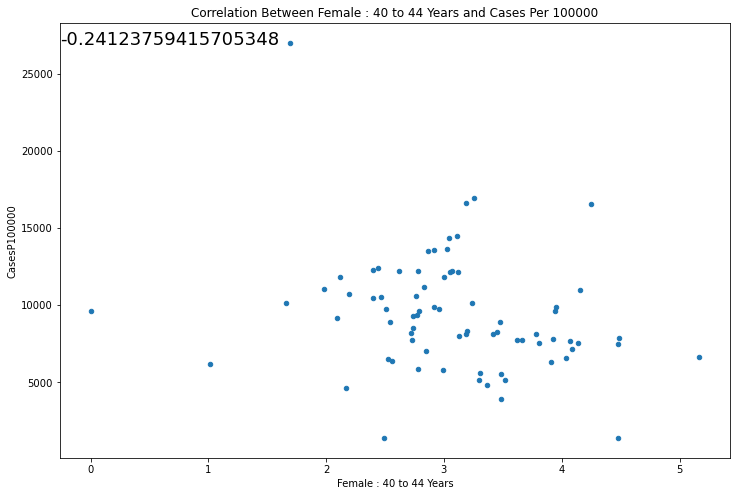

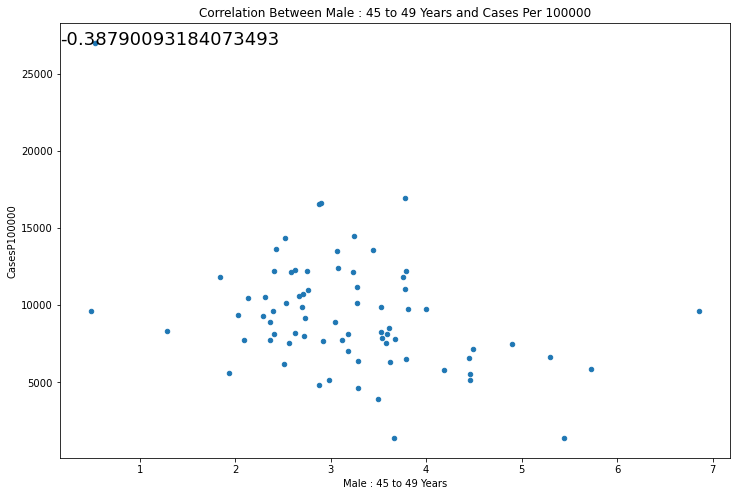

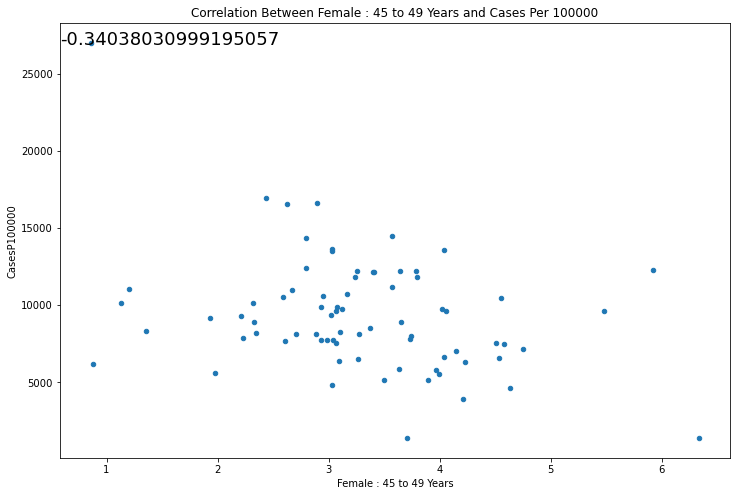

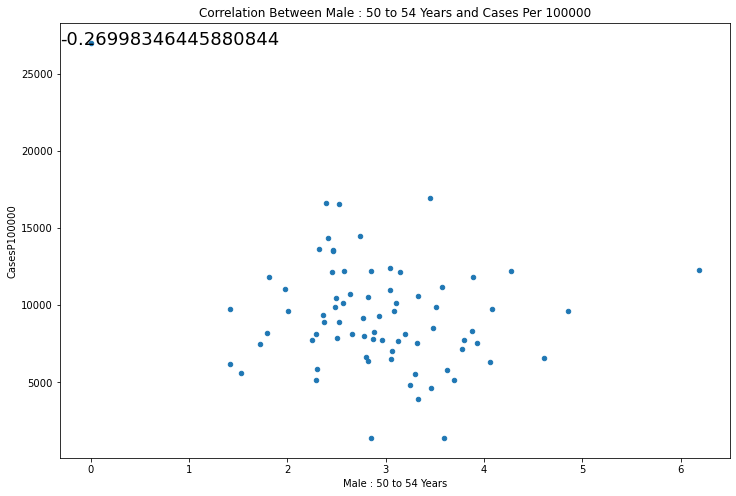

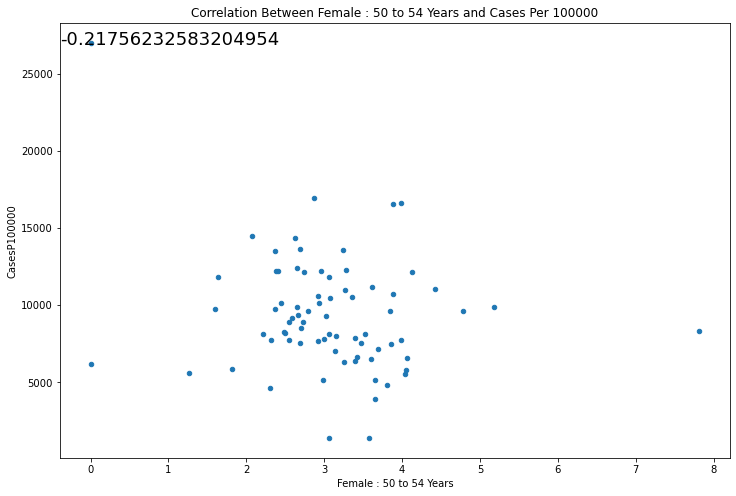

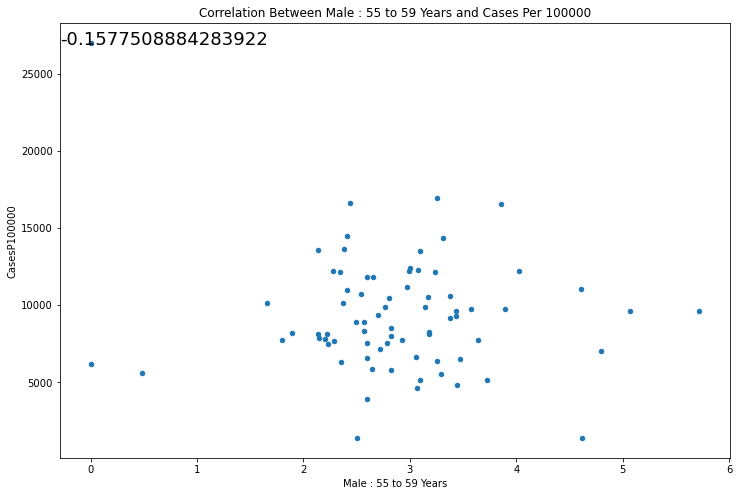

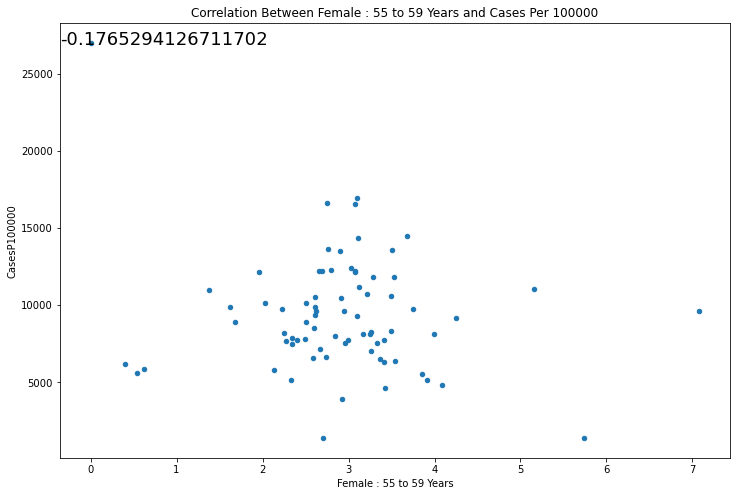

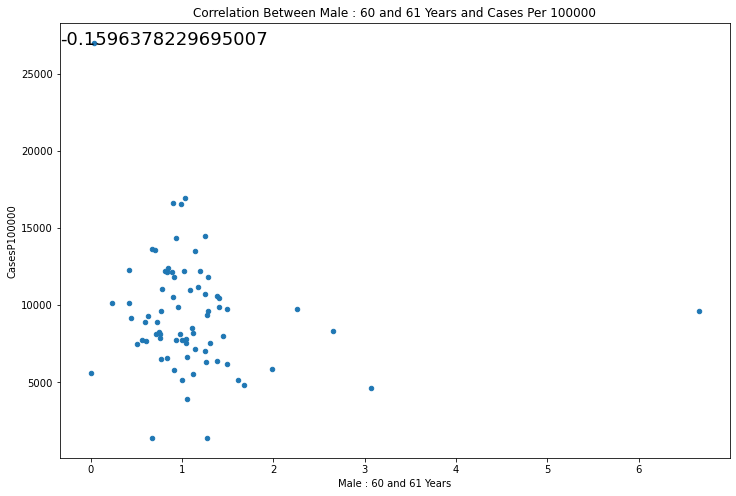

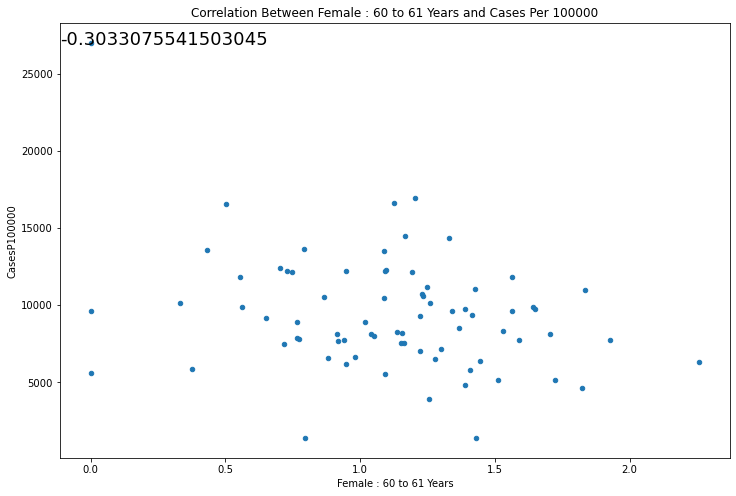

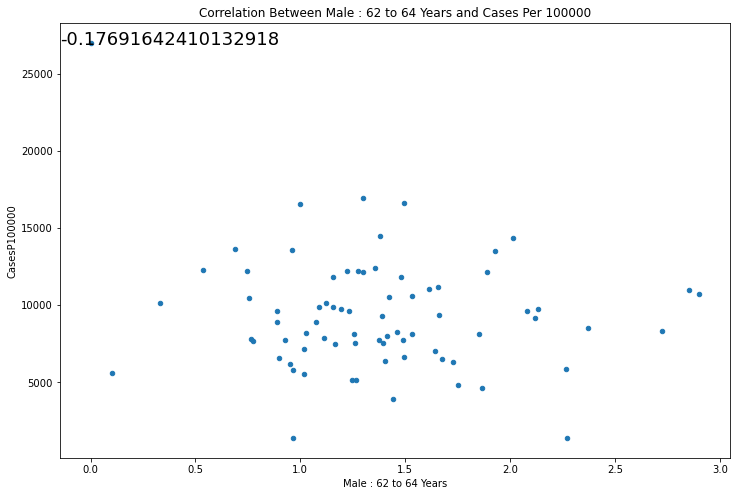

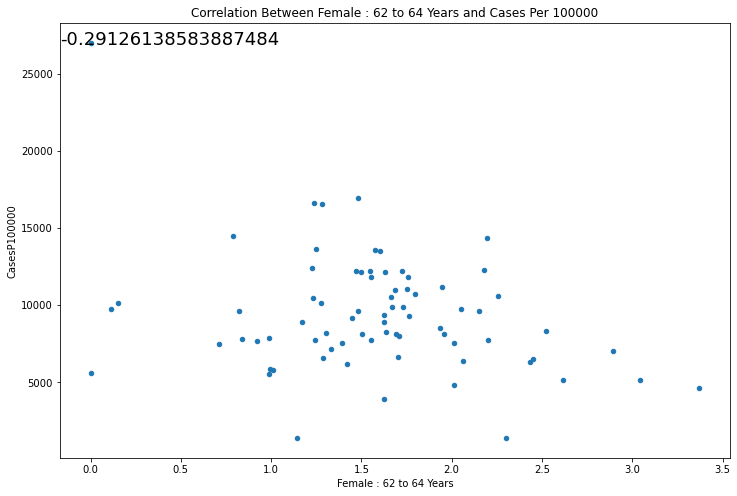

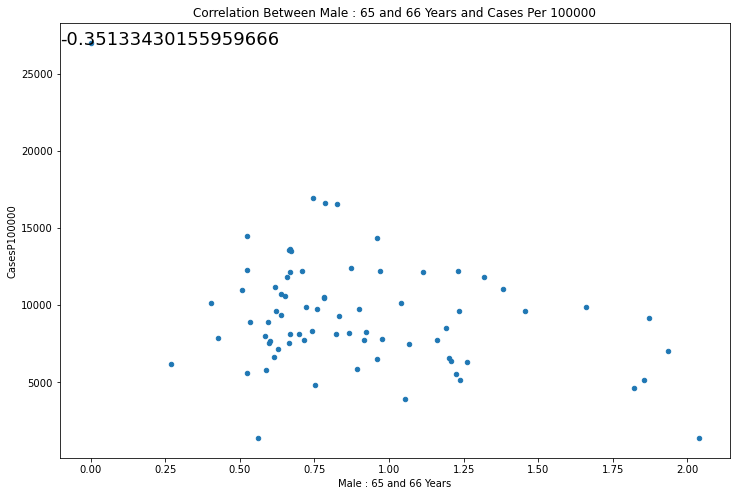

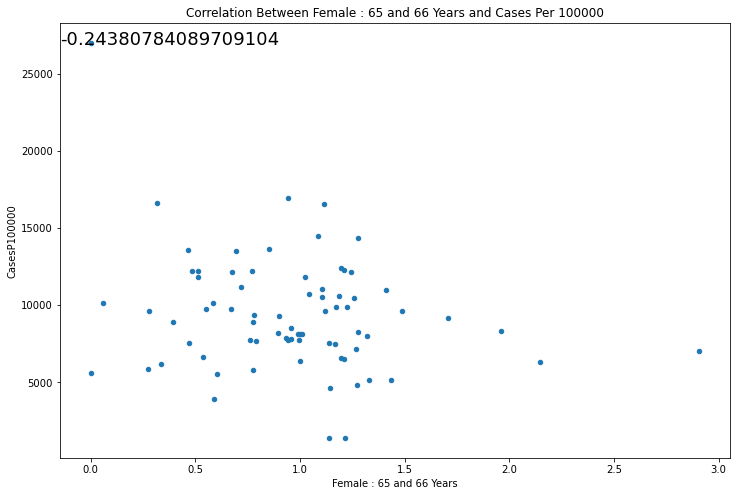

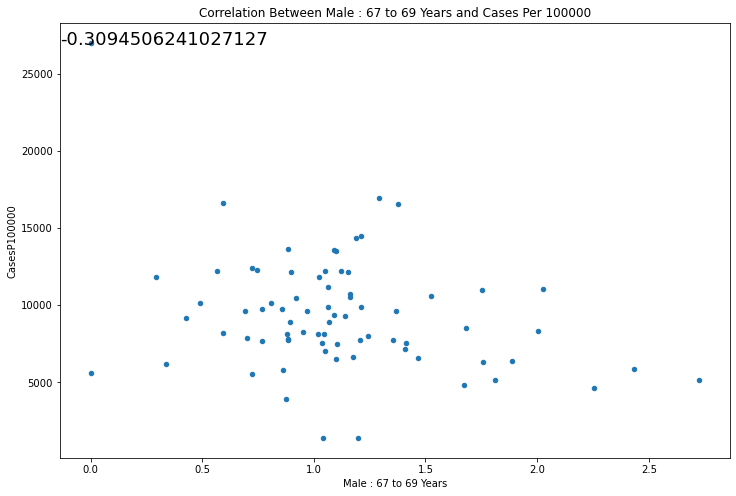

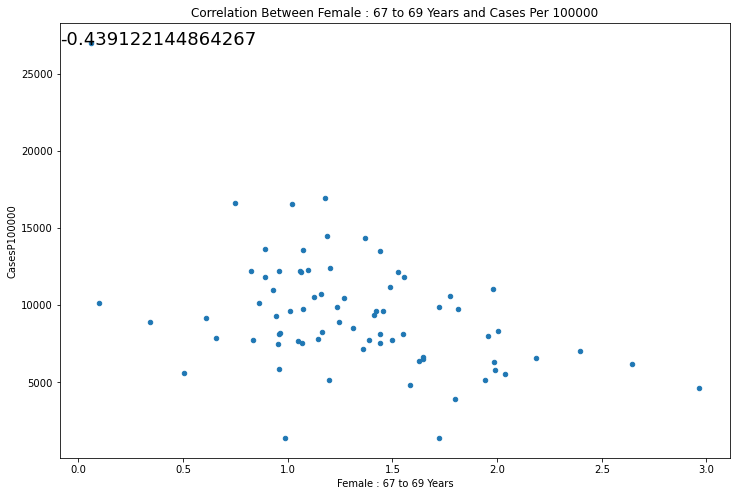

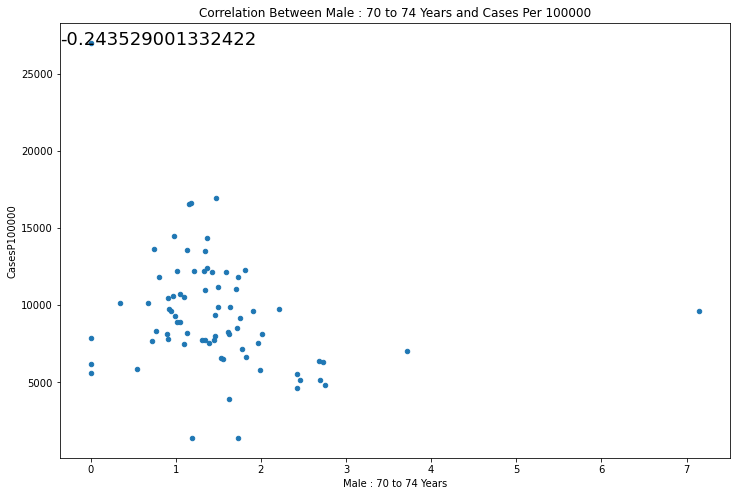

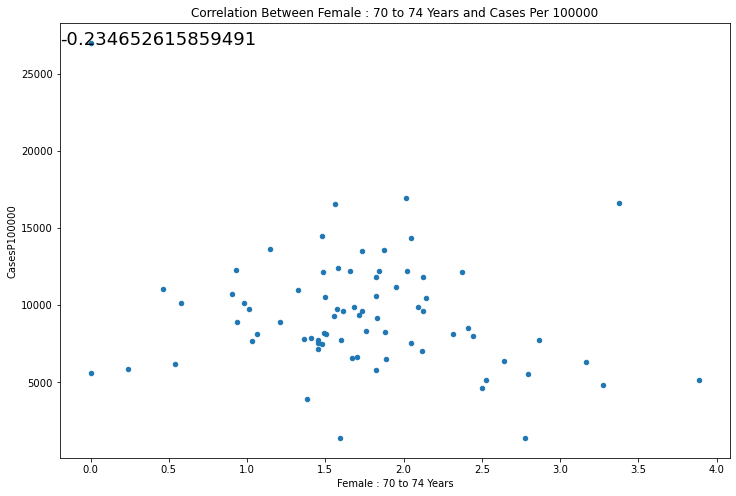

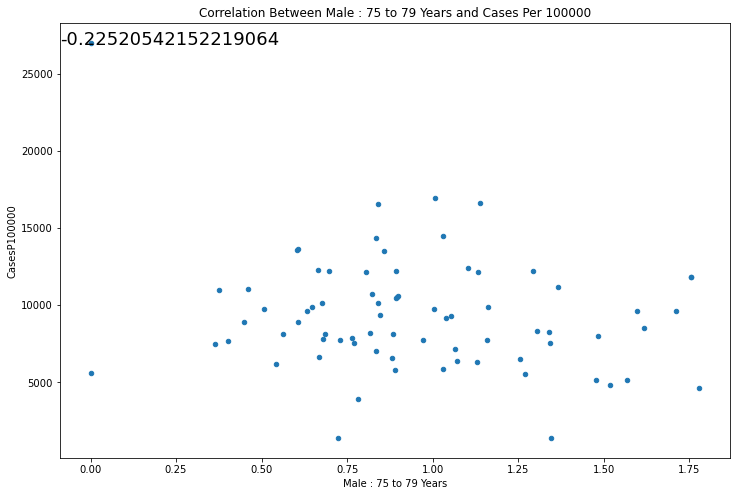

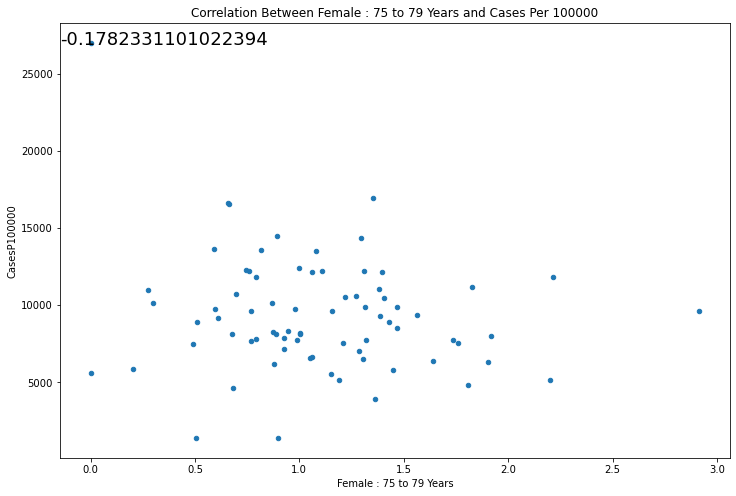

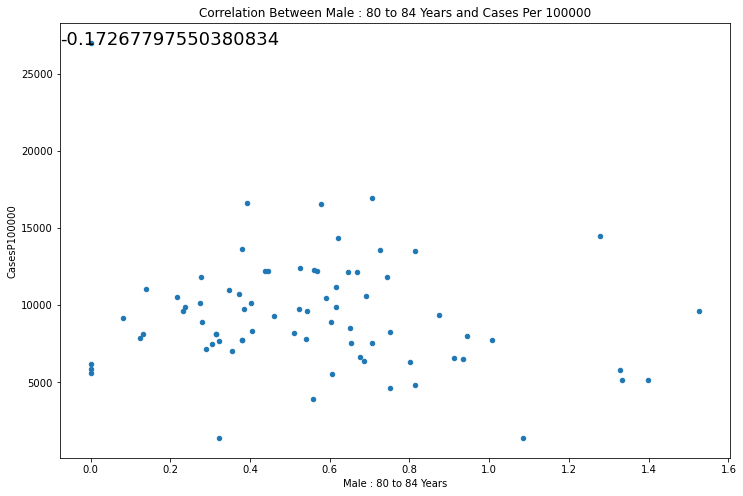

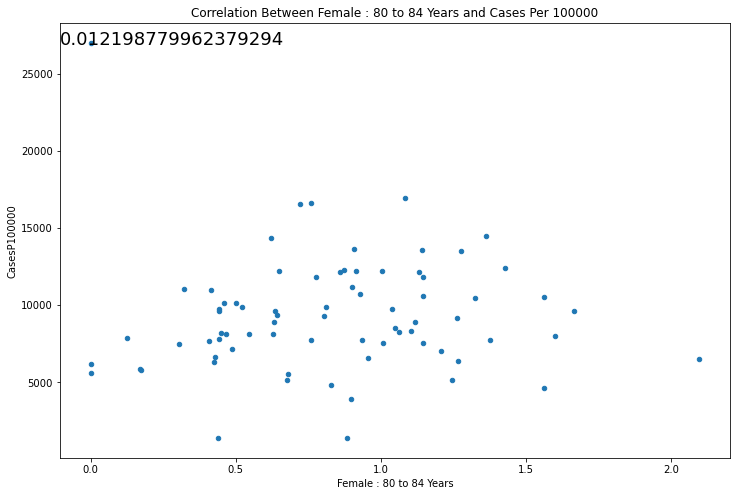

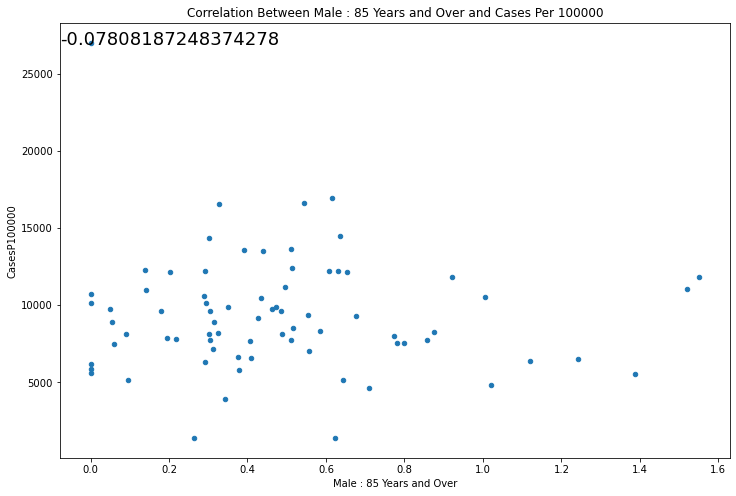

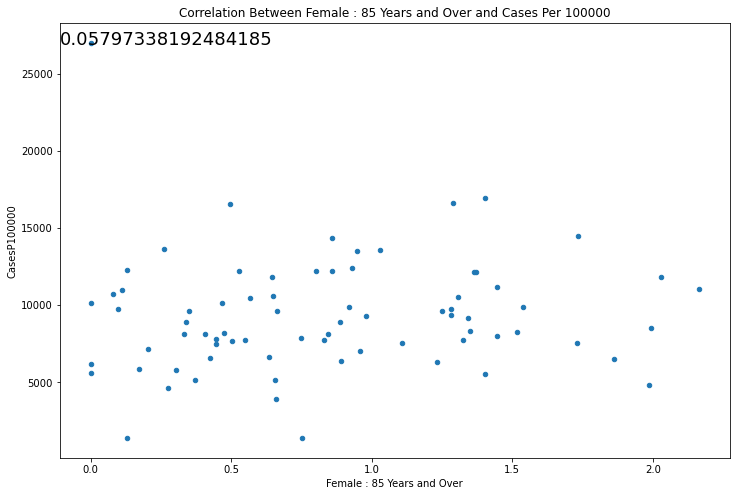

In [10]:
age_list =["Total Male", "Total Female", "Male : Under 5 Years", "Female : Under 5 Years", "Male : 5 to 9 Years", "Female : 5 to 9 Years",
            "Male : 10 to 14 Years", "Female : 10 to 14 Years", "Male : 15 to 17 Years", "Female : 15 to 17 Years", "Male : 18 and 19 Years", "Female : 18 and 19 Years",
            "Male : 20 Years", "Female : 20 Years", "Male : 21 Years", "Female : 21 Years", "Male : 22 to 24 Years",
            "Female : 22 to 24 Years", "Male : 25 to 29 Years", "Female : 25 to 29 Years", "Male : 30 to 34 Years",
            "Female : 30 to 34 Years", "Male : 35 to 39 Years", "Female : 35 to 39 Years", "Male : 40 to 44 Years",
            "Female : 40 to 44 Years", "Male : 45 to 49 Years", "Female : 45 to 49 Years", "Male : 50 to 54 Years",
            "Female : 50 to 54 Years", "Male : 55 to 59 Years", "Female : 55 to 59 Years", "Male : 60 and 61 Years",
             "Female : 60 to 61 Years", "Male : 62 to 64 Years", "Female : 62 to 64 Years", "Male : 65 and 66 Years",
            "Female : 65 and 66 Years", "Male : 67 to 69 Years", "Female : 67 to 69 Years", "Male : 70 to 74 Years",
            "Female : 70 to 74 Years", "Male : 75 to 79 Years", "Female : 75 to 79 Years", "Male : 80 to 84 Years",
            "Female : 80 to 84 Years", "Male : 85 Years and Over", "Female : 85 Years and Over"]
for element in age_list:
    age_percentage.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(age_percentage[element],
                                 age_percentage["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

In [19]:
# age plots with majority hispanic and non hispanic zip codes (Not currently working)

#Import ZipcodeFilters to merge with
majorityhispanic_filter = pd.read_csv(r"majorityhispanic_filter")
majoritynonhispanic_filter = pd.read_csv(r"majoritynonhispanic_filter")

#merge left onto the filter to get data for only those zip codes
agepercentage_majhf = pd.DataFrame
ageperentage_majnhf = pd.DataFrame
agepercentage_majhf = pd.merge(majorityhispanic_filter,age_percentage, on="ZipInt",how="left")
agepercentage_majnhf = pd.merge(majoritynonhispanic_filter,age_percentage, on= 'ZipInt', how = 'left')

#remove previously dropped row JBSA zipcode 78150
agepercentage_majnhf = agepercentage_majnhf.drop(8)
#verify results
display(agepercentage_majhf.head())
display(agepercentage_majnhf.head(40))

,Unnamed: 0,ZipInt,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ActiveCases,ActiveCaseRate,SHAPE_Length,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
0,0,78002,1,78002,9061,1063,11816.362830,6,66.696309,0.427542,...,0.292697,0.892726,1.726914,2.122055,1.756183,0.790282,0.278062,0.775648,1.551295,0.643934
1,4,78052,7,78052,699,39,5555.555556,3,427.350427,0.260085,...,0.723888,2.038706,2.422810,2.792141,1.270498,1.152312,0.605702,0.679569,1.388684,1.403457
2,5,78069,12,78069,2290,225,9723.422645,0,0.000000,0.254859,...,0.768602,1.815209,2.207686,1.013900,0.506950,0.981194,0.523303,0.441537,0.049060,0.098119
3,6,78073,13,78073,7312,920,12273.212380,2,26.680896,0.580798,...,0.745921,1.095571,1.818182,0.932401,0.664336,0.745921,0.559441,0.874126,0.139860,0.128205
4,10,78112,17,78112,8791,945,10716.715810,6,68.042640,0.542672,...,1.160497,1.160497,1.056052,0.905187,0.823953,0.696298,0.371359,0.928397,0.000000,0.081235


,Unnamed: 0,ZipInt,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ActiveCases,ActiveCaseRate,SHAPE_Length,...,Male : 67 to 69 Years,Female : 67 to 69 Years,Male : 70 to 74 Years,Female : 70 to 74 Years,Male : 75 to 79 Years,Female : 75 to 79 Years,Male : 80 to 84 Years,Female : 80 to 84 Years,Male : 85 Years and Over,Female : 85 Years and Over
0,1,78006,2.0,78006.0,5243.0,278.0,4851.657941,3.0,52.356021,0.552725,...,1.672398,1.583648,2.751276,3.272687,1.519858,1.808298,0.812625,0.826492,1.020635,1.985800
1,2,78015,4.0,78015.0,12254.0,664.0,5167.315175,7.0,54.474708,0.278955,...,2.725950,1.195370,2.694327,2.523560,1.568528,2.200999,1.397761,0.676744,0.094871,0.373158
2,3,78023,5.0,78023.0,29569.0,1947.0,6588.163638,15.0,50.756268,0.886455,...,1.466977,2.184520,1.533948,1.671078,0.880186,1.052397,0.912077,0.956724,0.408202,0.424148
3,7,78101,14.0,78101.0,4485.0,311.0,6999.774927,1.0,22.507315,0.543172,...,1.051817,2.397525,3.712297,2.119103,0.835267,1.283836,0.355762,1.206497,0.556845,0.959010
4,8,78108,15.0,78108.0,880.0,14.0,1421.319797,1.0,101.522843,0.304887,...,1.200030,0.985025,1.195030,1.595040,0.722518,0.897522,0.322508,0.440011,0.265007,0.130003
5,9,78109,16.0,78109.0,50260.0,4193.0,8162.510464,48.0,93.441570,0.737849,...,0.880082,0.958033,0.902713,1.061128,0.563253,0.678921,0.314315,0.465186,0.090523,0.331917
6,11,78124,20.0,78124.0,614.0,9.0,1388.888889,0.0,0.000000,0.457999,...,1.041516,1.721394,1.735860,2.777376,1.345291,0.506292,1.084912,0.882395,0.622016,0.752206
7,12,78148,21.0,78148.0,20881.0,1583.0,7742.345691,12.0,58.691187,0.308431,...,1.354856,0.836165,1.310141,2.861742,1.158111,1.734931,1.006081,1.377213,0.304060,0.549991
9,14,78152,23.0,78152.0,2234.0,276.0,11066.559740,1.0,40.096231,0.495777,...,2.026716,1.980654,1.704284,0.460617,0.460617,1.381852,0.138185,0.322432,1.520037,2.164901
10,15,78154,24.0,78154.0,12029.0,493.0,3928.286853,2.0,15.936255,0.739526,...,0.874685,1.797829,1.623377,1.381082,0.782613,1.361698,0.557279,0.896492,0.341636,0.659042


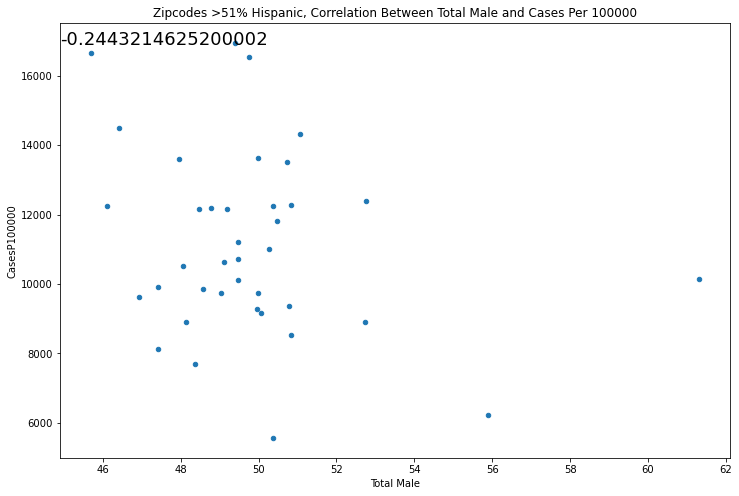

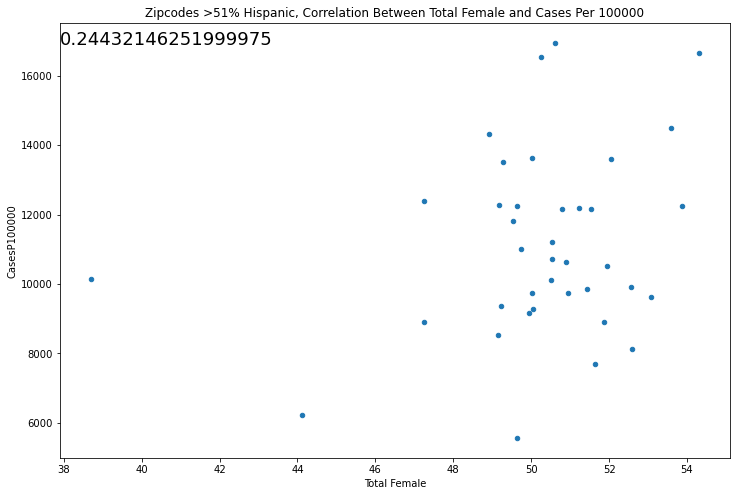

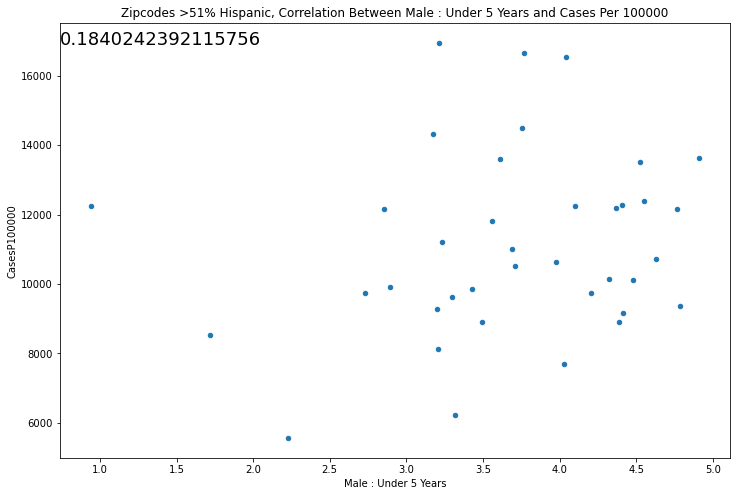

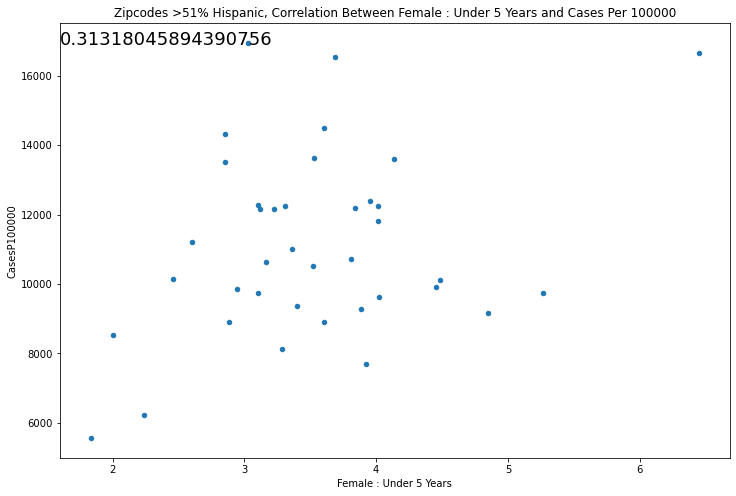

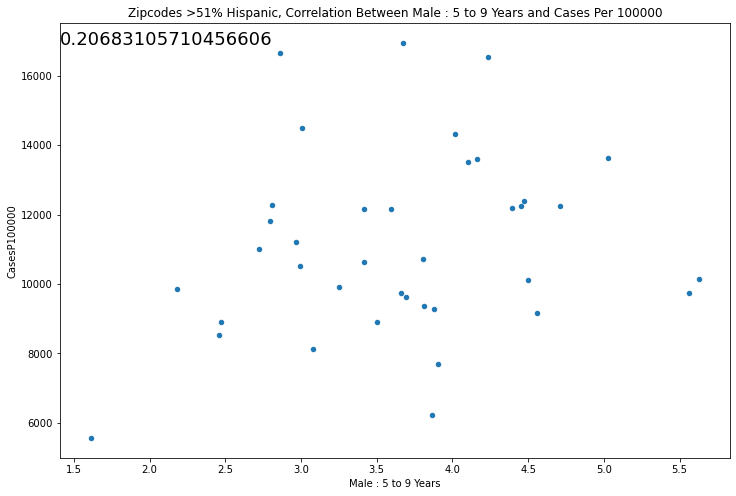

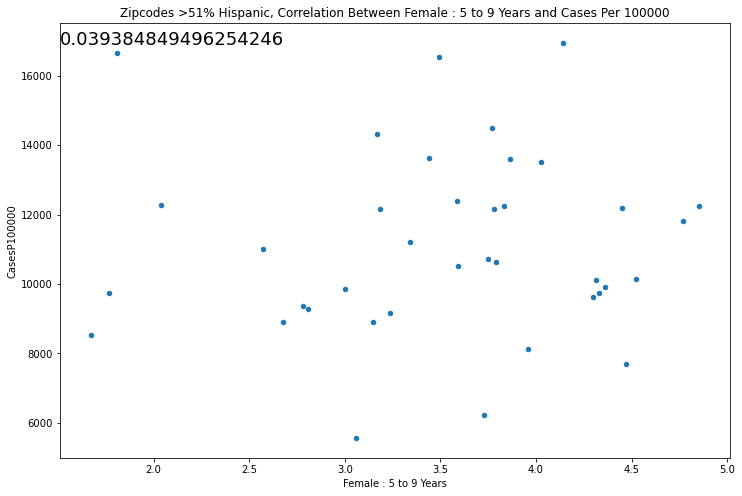

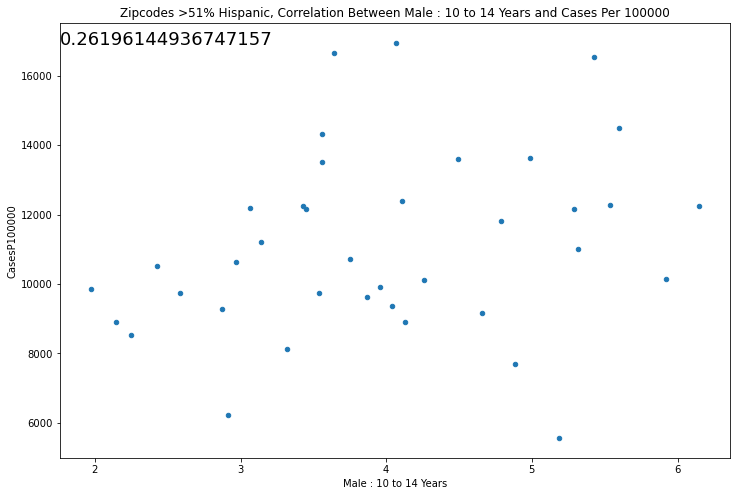

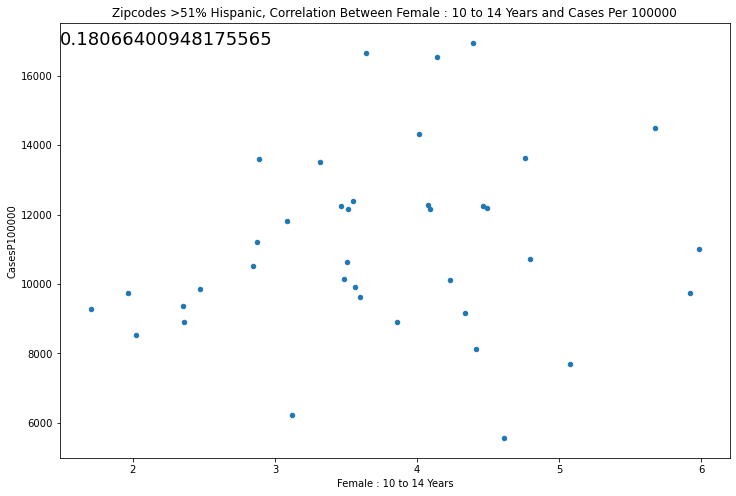

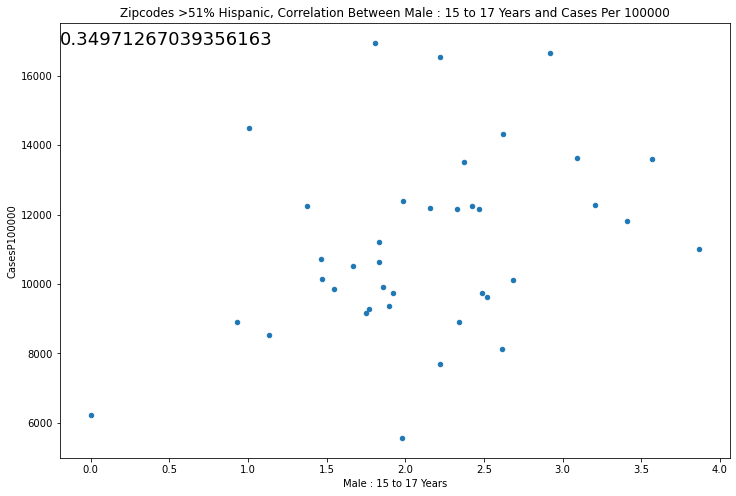

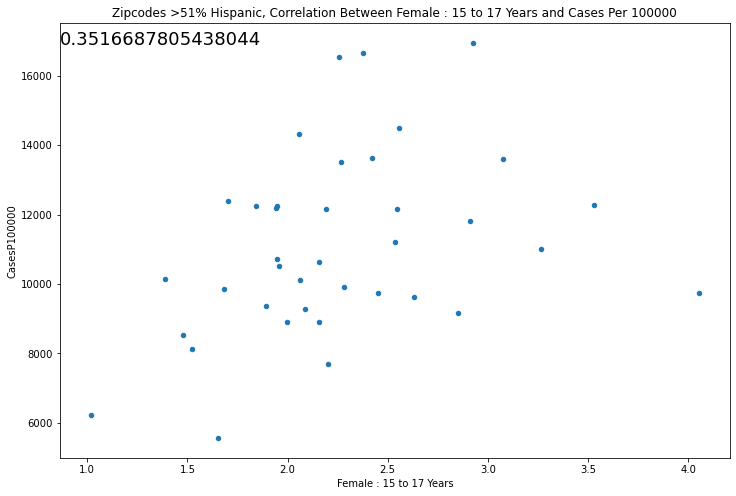

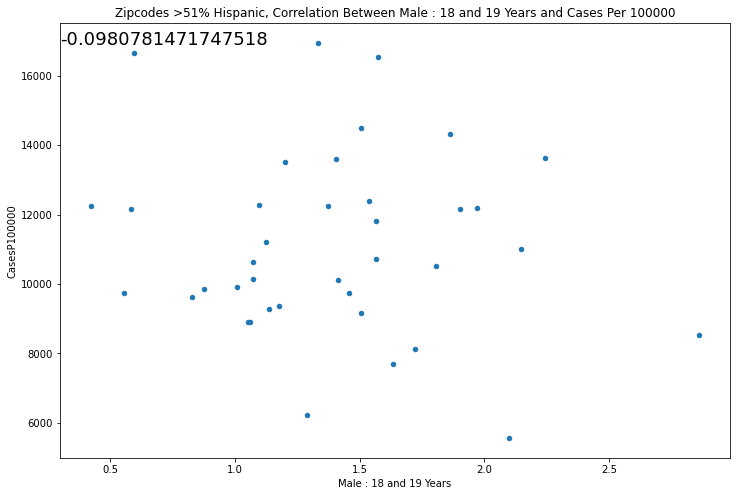

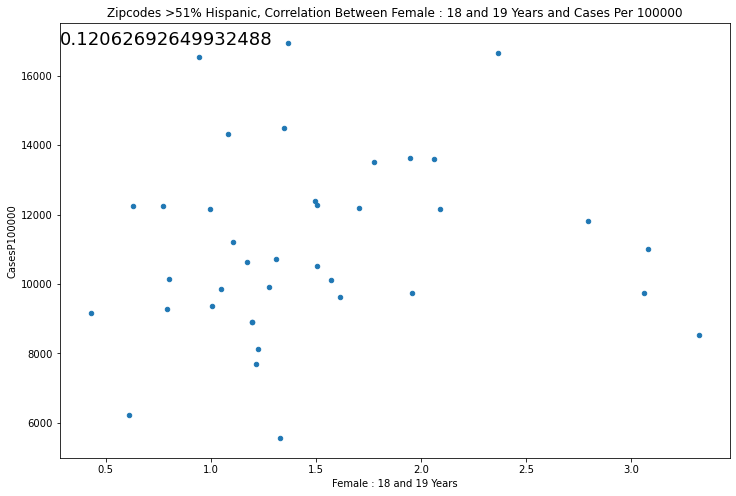

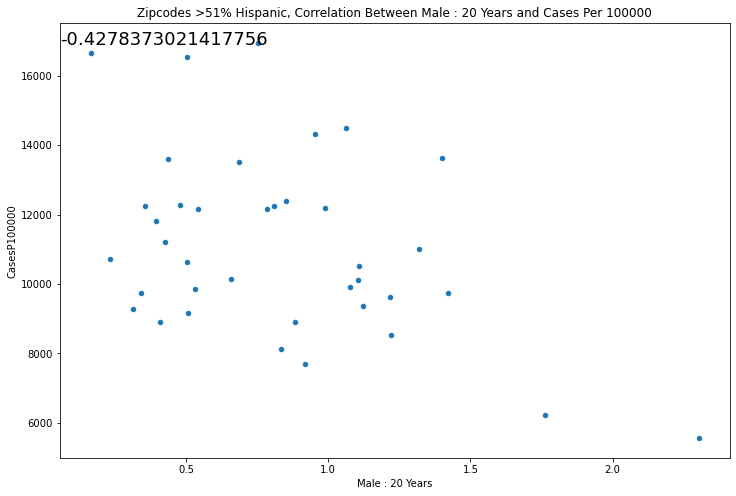

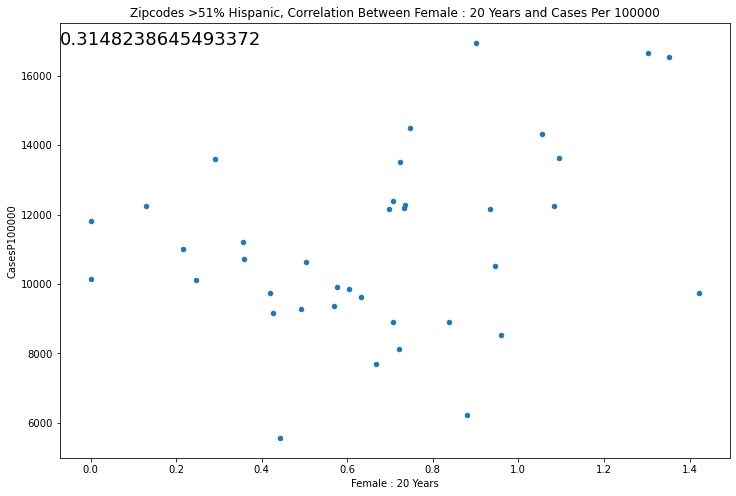

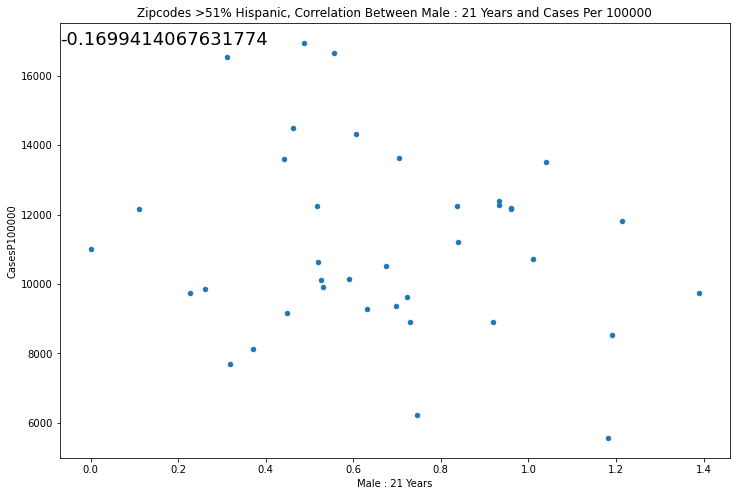

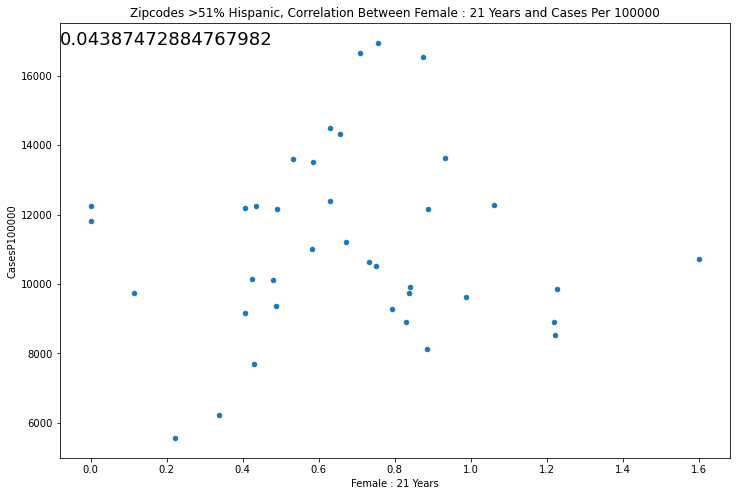

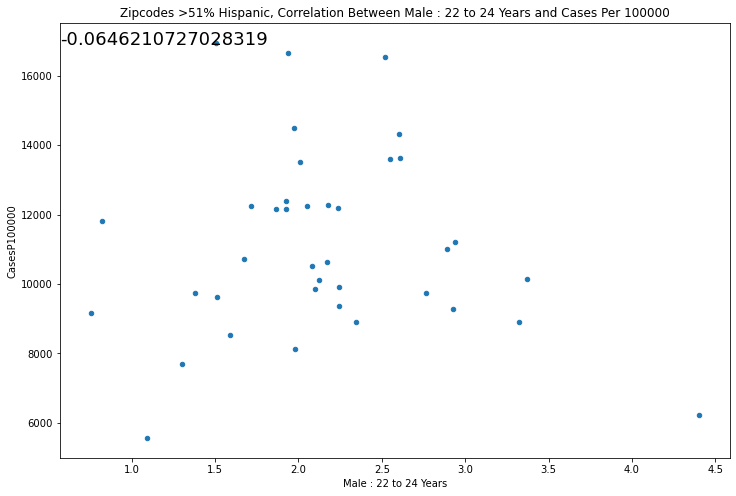

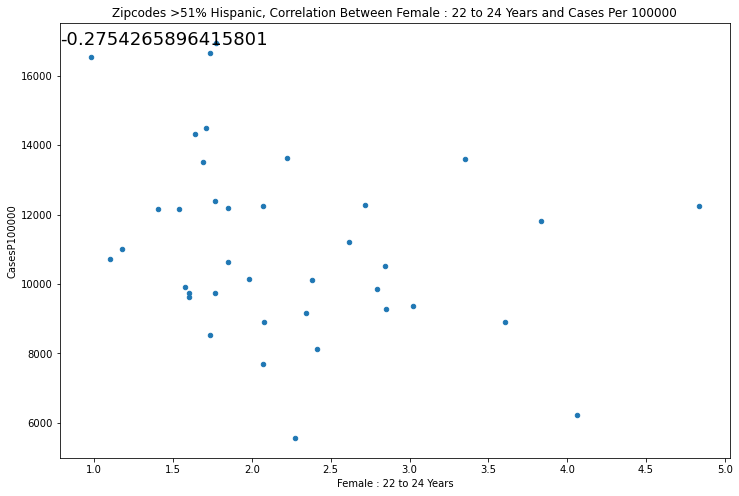

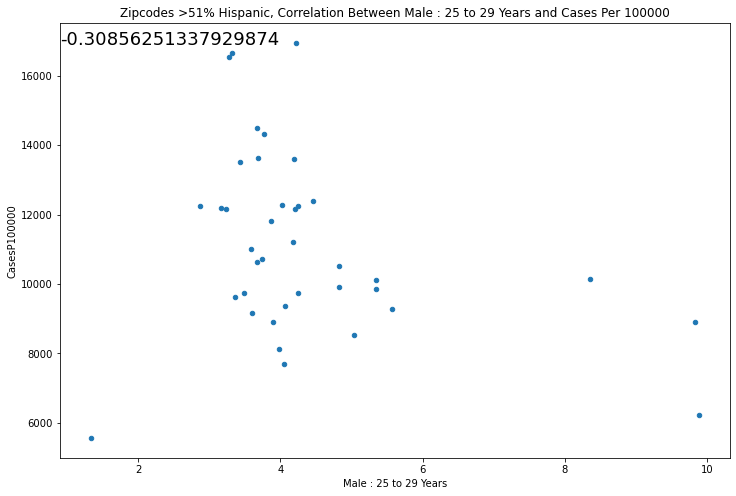

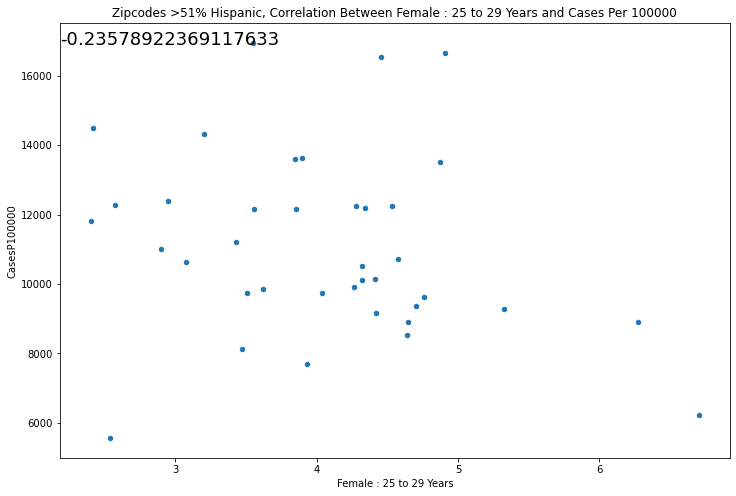

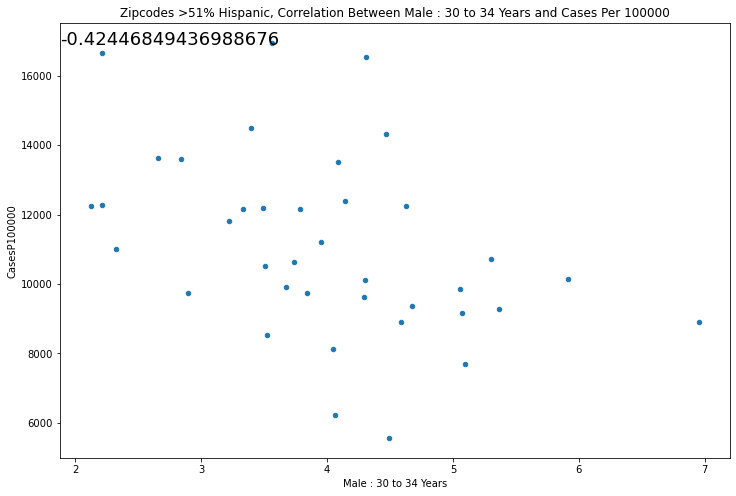

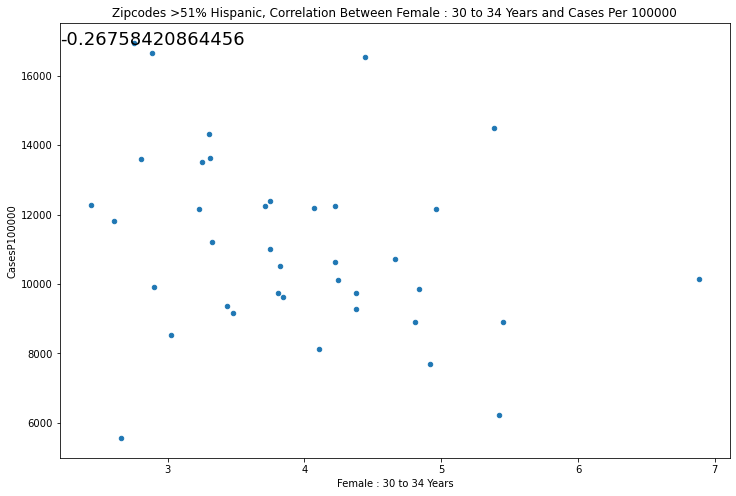

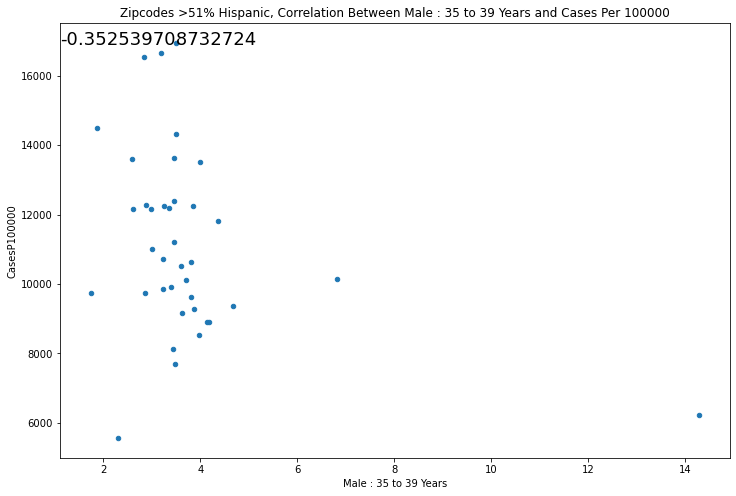

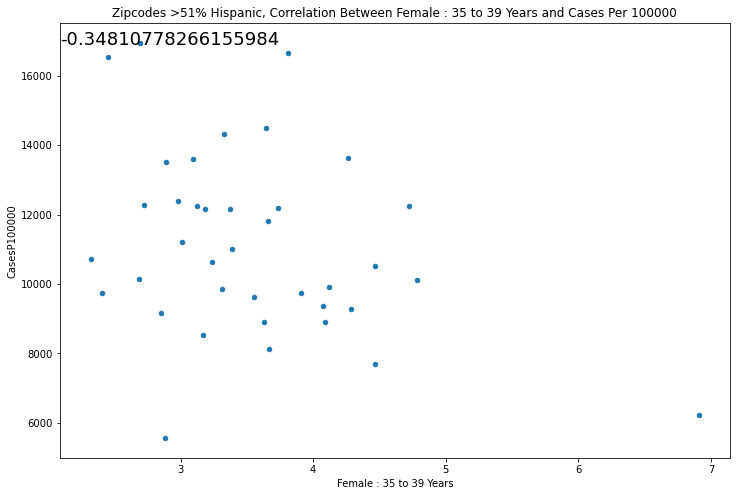

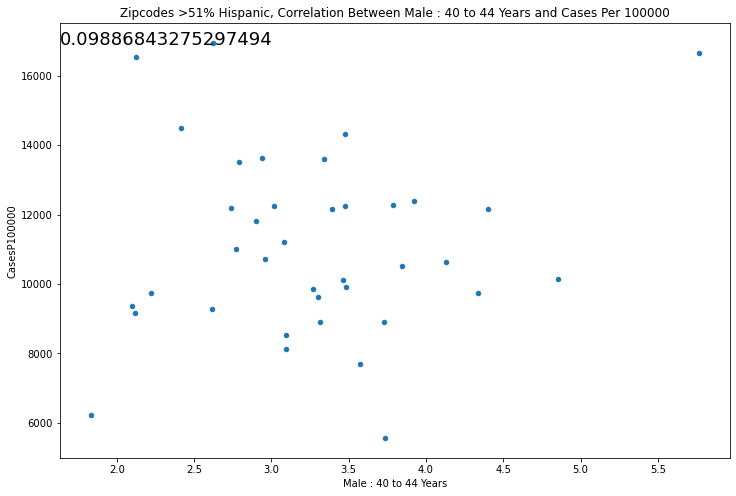

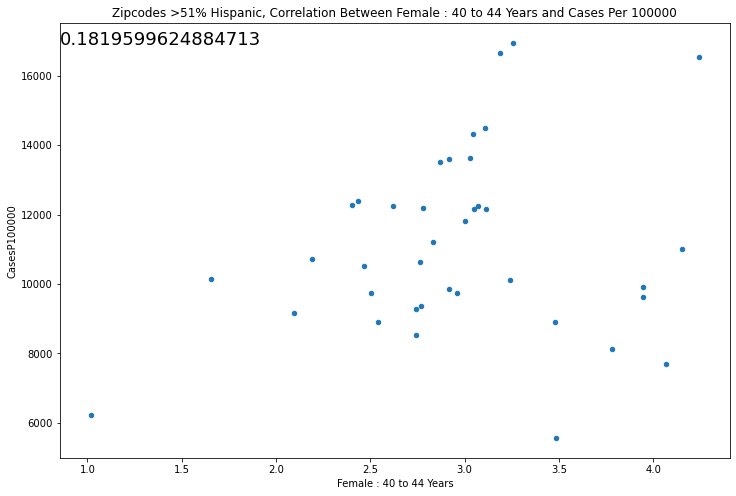

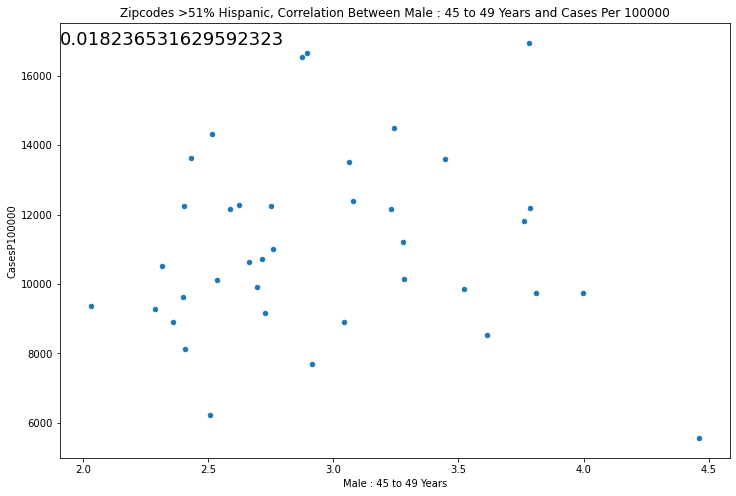

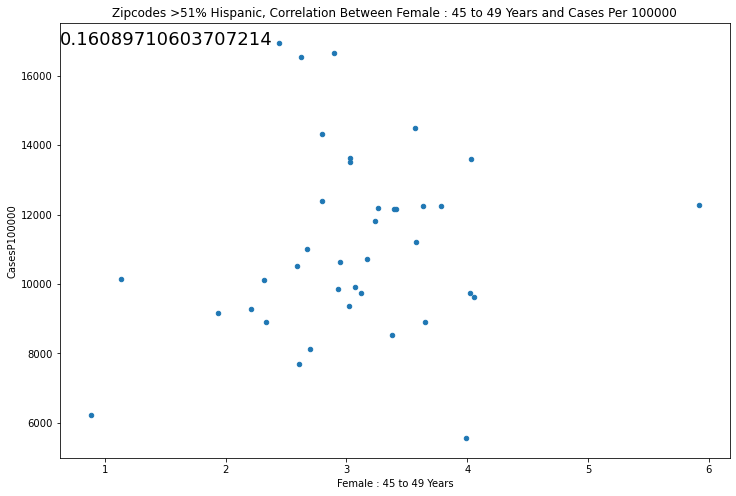

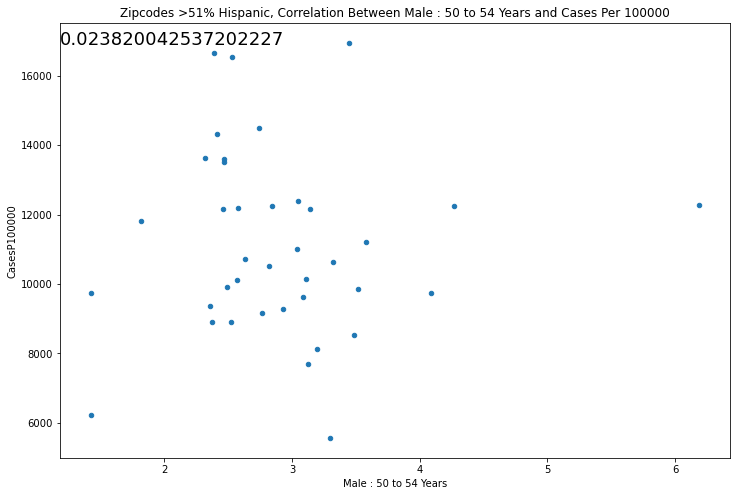

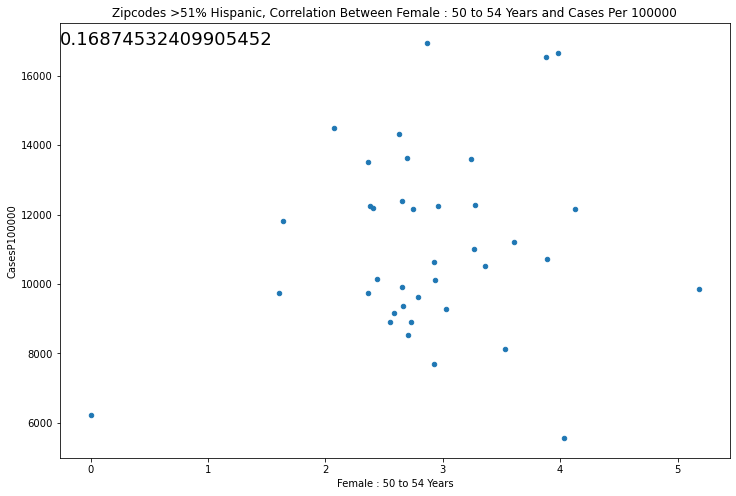

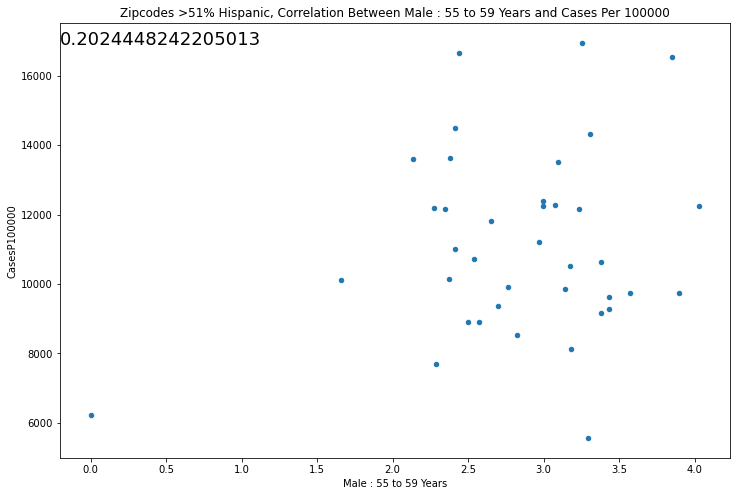

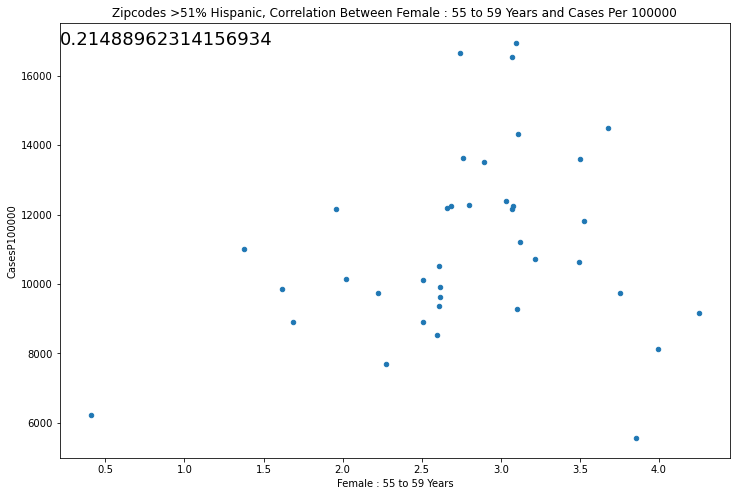

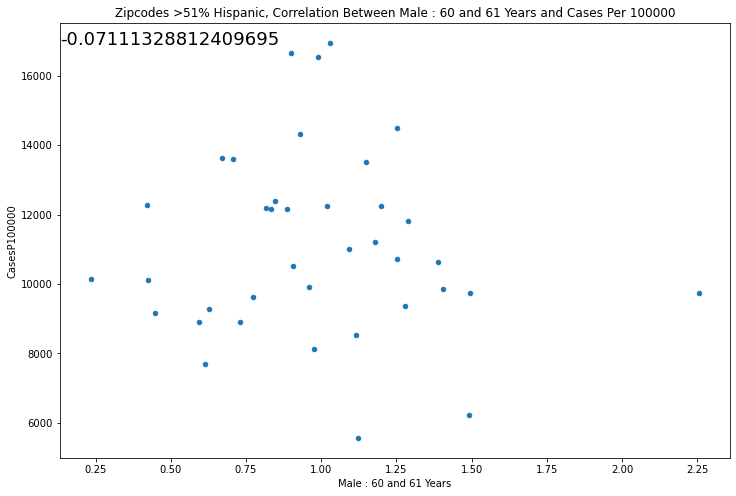

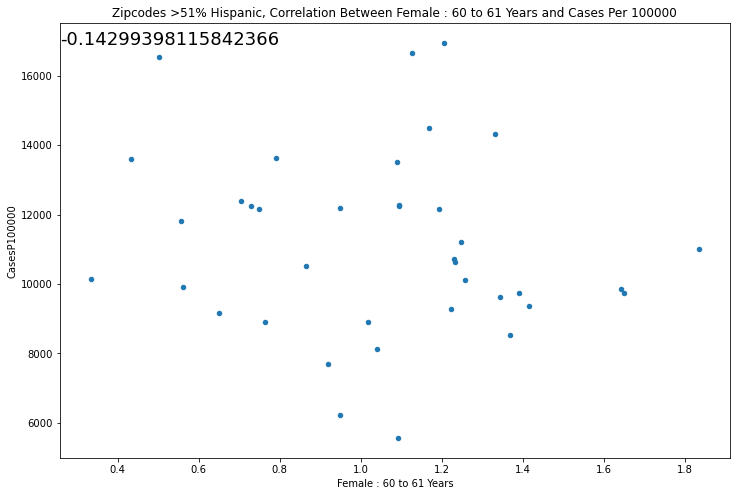

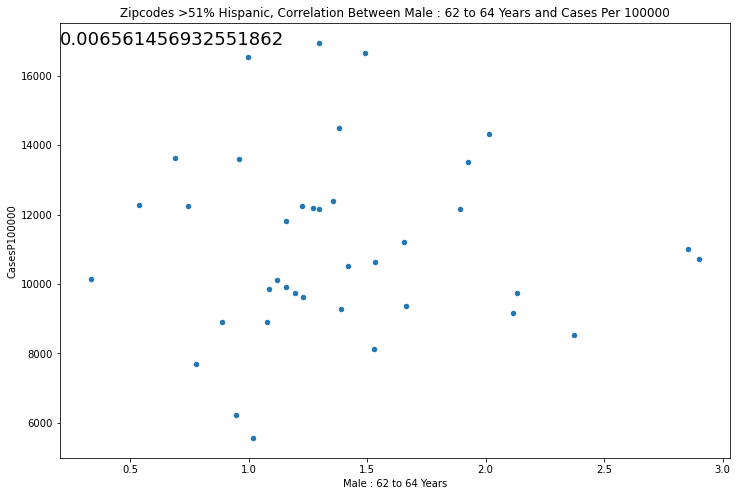

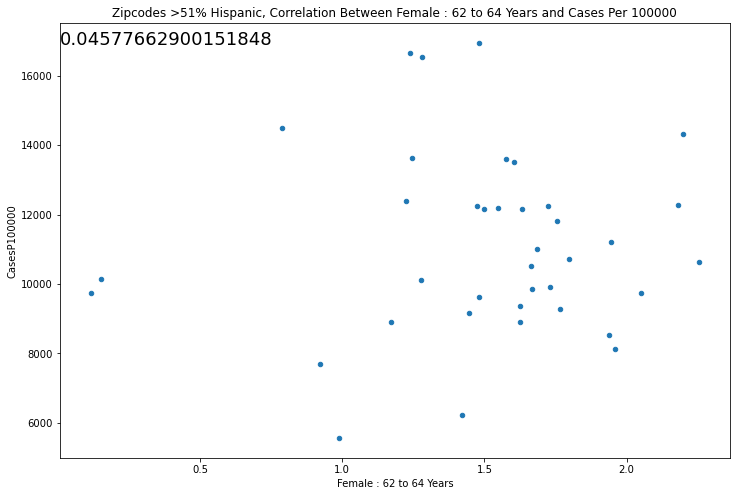

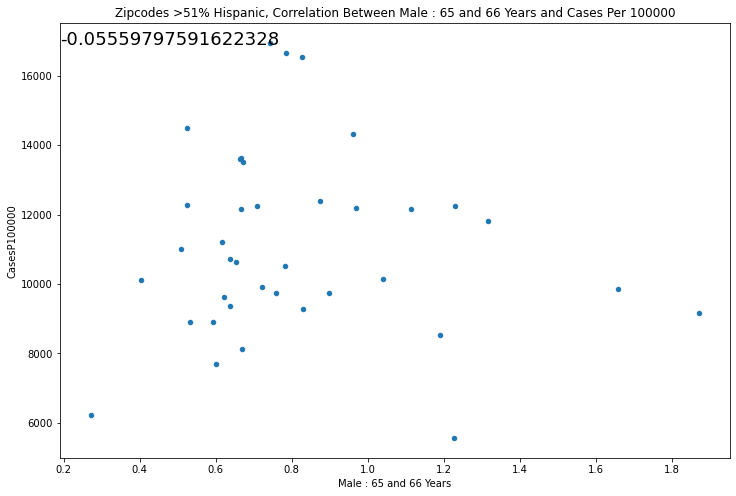

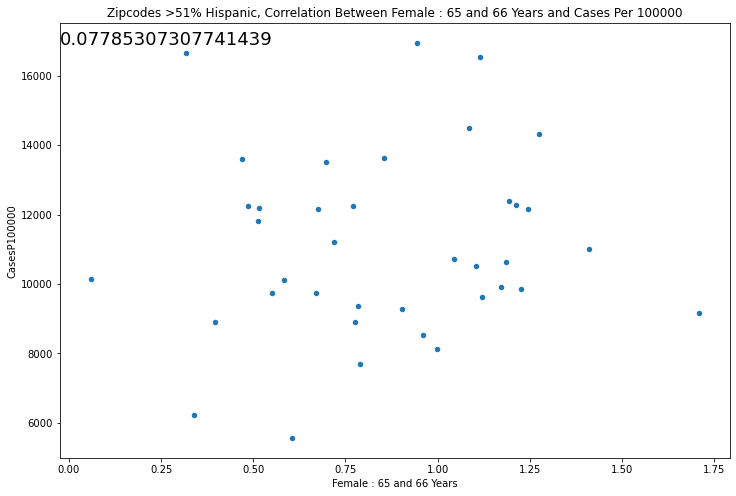

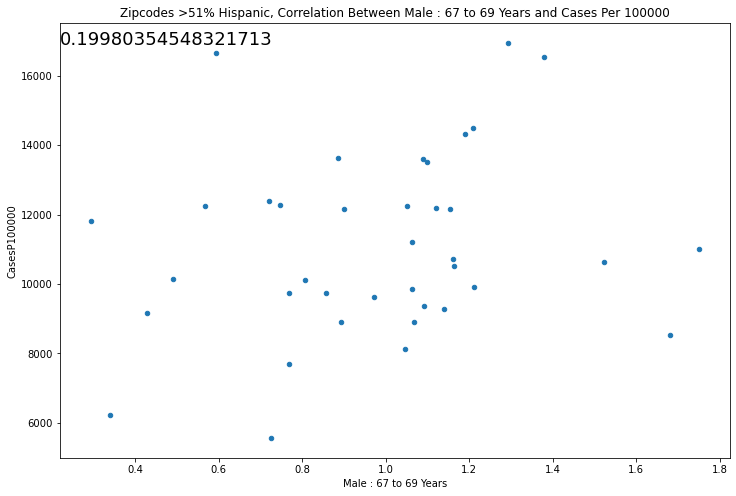

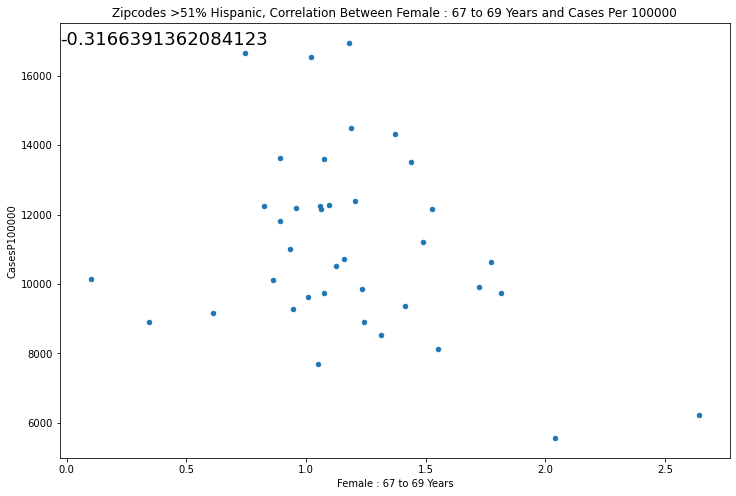

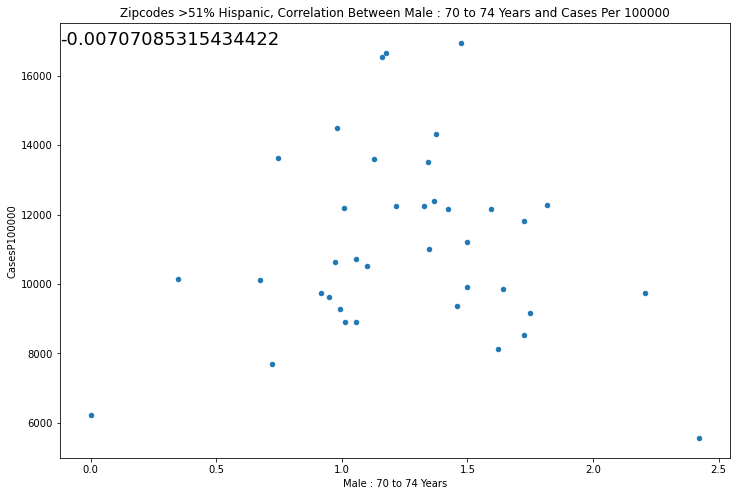

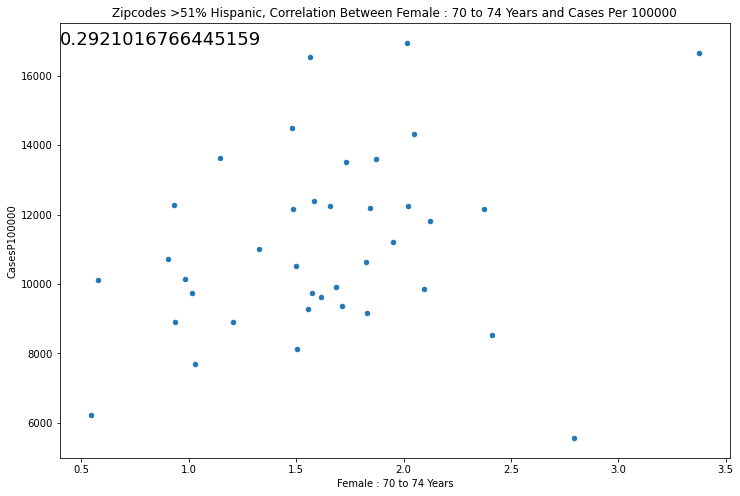

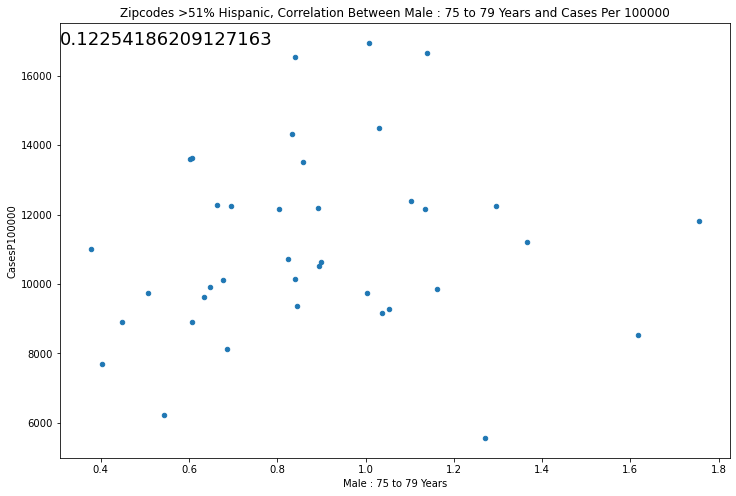

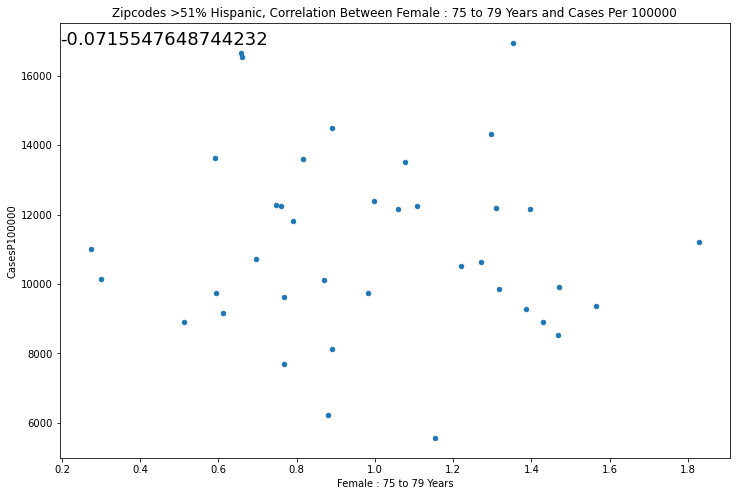

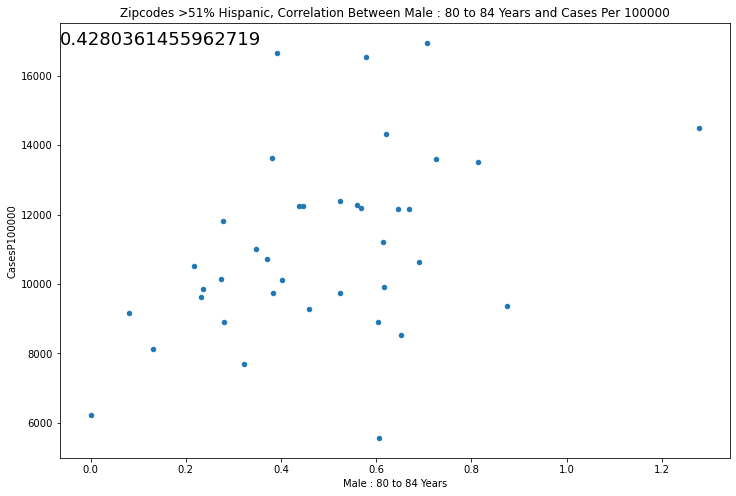

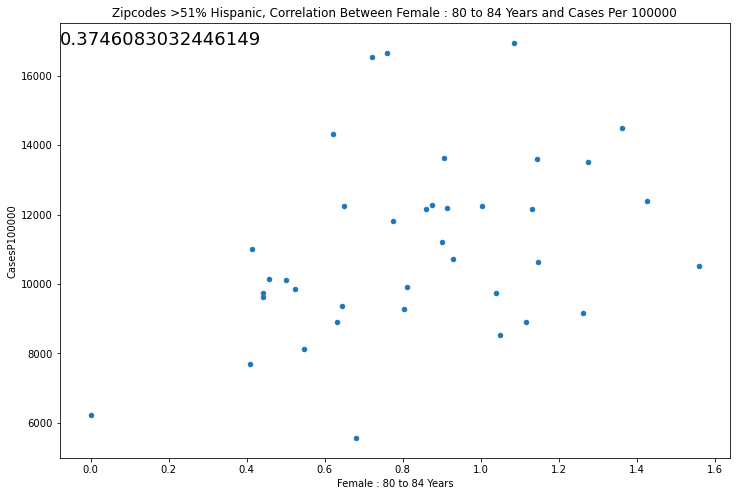

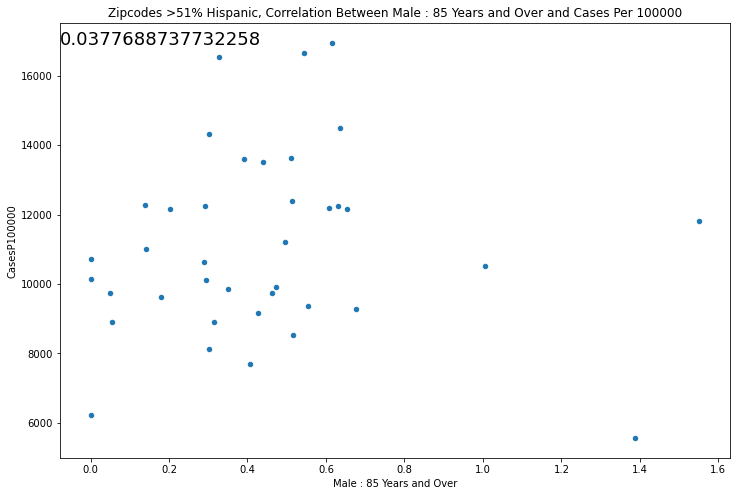

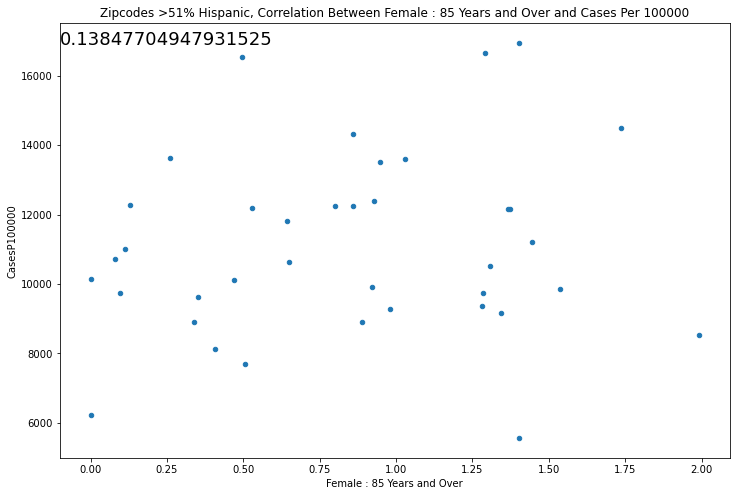

In [21]:
# Scatter plots for majority hispanic zipcodes
age_list =["Total Male", "Total Female", "Male : Under 5 Years", "Female : Under 5 Years", "Male : 5 to 9 Years", "Female : 5 to 9 Years",
            "Male : 10 to 14 Years", "Female : 10 to 14 Years", "Male : 15 to 17 Years", "Female : 15 to 17 Years", "Male : 18 and 19 Years", "Female : 18 and 19 Years",
            "Male : 20 Years", "Female : 20 Years", "Male : 21 Years", "Female : 21 Years", "Male : 22 to 24 Years",
            "Female : 22 to 24 Years", "Male : 25 to 29 Years", "Female : 25 to 29 Years", "Male : 30 to 34 Years",
            "Female : 30 to 34 Years", "Male : 35 to 39 Years", "Female : 35 to 39 Years", "Male : 40 to 44 Years",
            "Female : 40 to 44 Years", "Male : 45 to 49 Years", "Female : 45 to 49 Years", "Male : 50 to 54 Years",
            "Female : 50 to 54 Years", "Male : 55 to 59 Years", "Female : 55 to 59 Years", "Male : 60 and 61 Years",
             "Female : 60 to 61 Years", "Male : 62 to 64 Years", "Female : 62 to 64 Years", "Male : 65 and 66 Years",
            "Female : 65 and 66 Years", "Male : 67 to 69 Years", "Female : 67 to 69 Years", "Male : 70 to 74 Years",
            "Female : 70 to 74 Years", "Male : 75 to 79 Years", "Female : 75 to 79 Years", "Male : 80 to 84 Years",
            "Female : 80 to 84 Years", "Male : 85 Years and Over", "Female : 85 Years and Over"]
for element in age_list:
    agepercentage_majhf.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Zipcodes >51% Hispanic, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(agepercentage_majhf[element],
                                 agepercentage_majhf["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

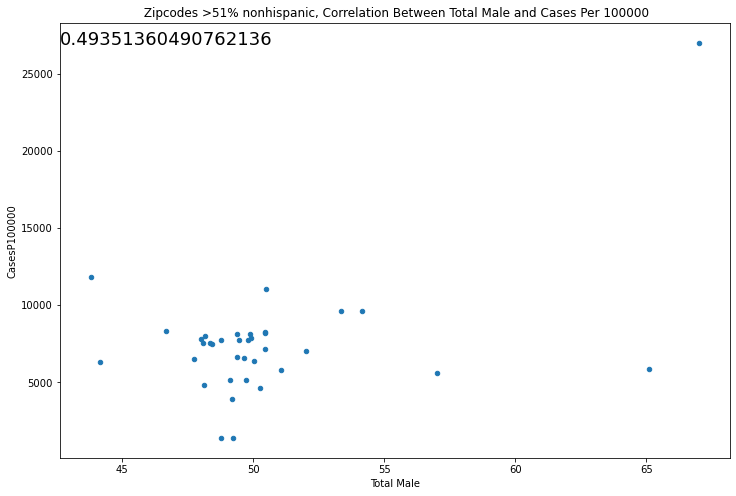

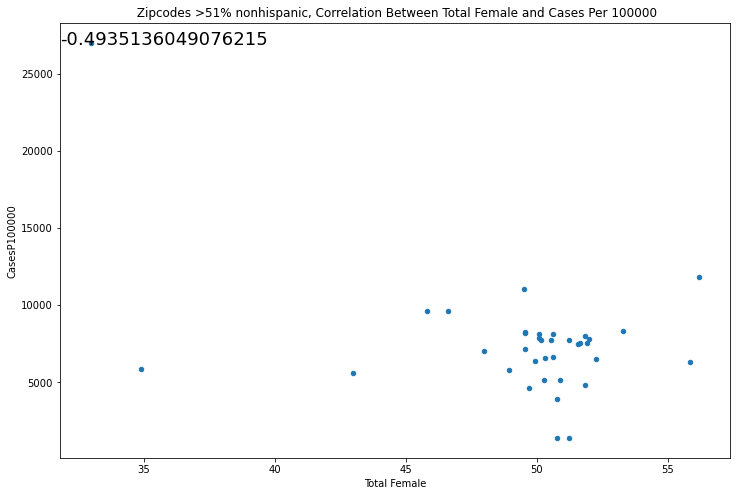

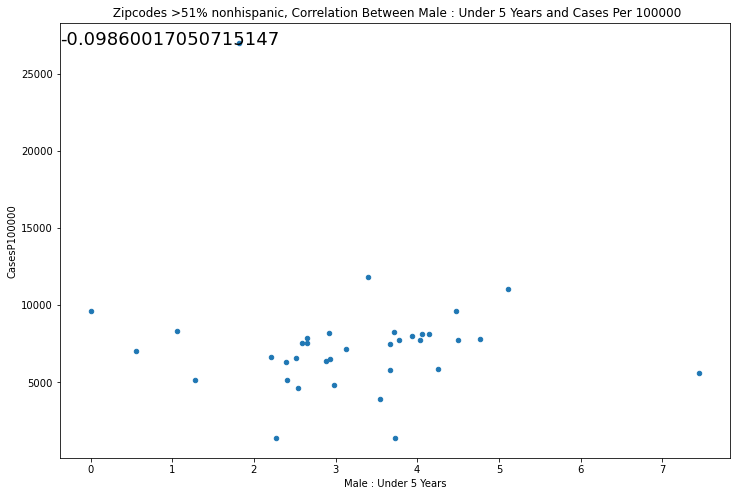

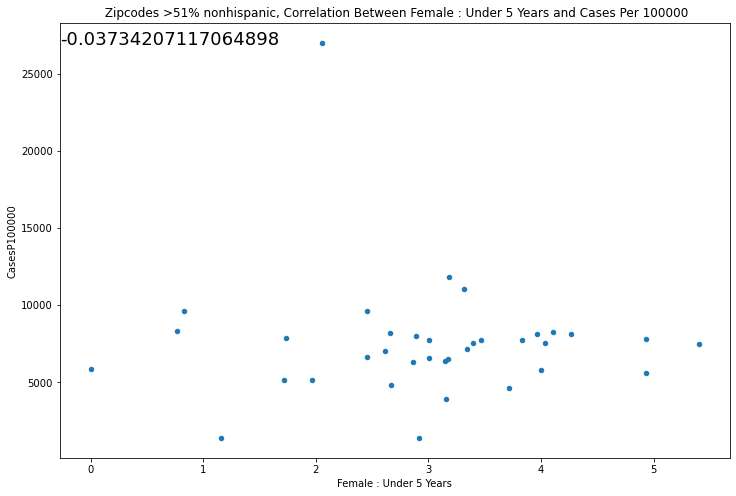

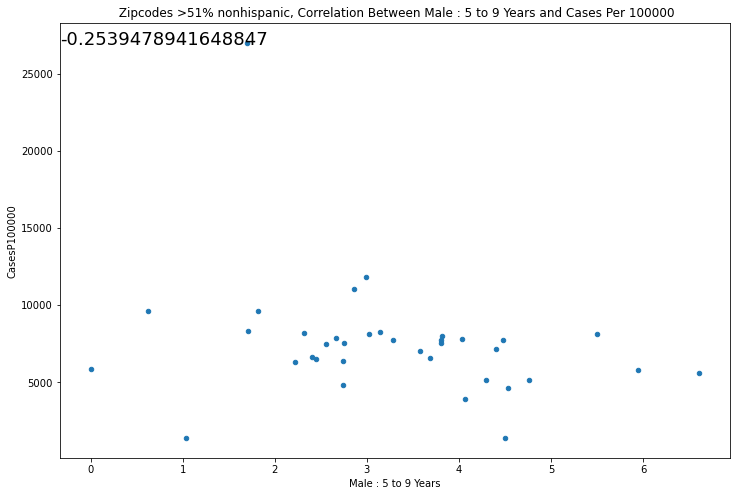

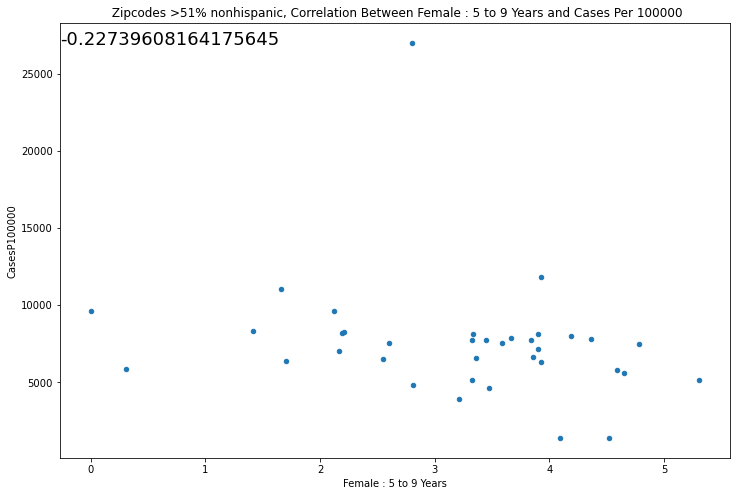

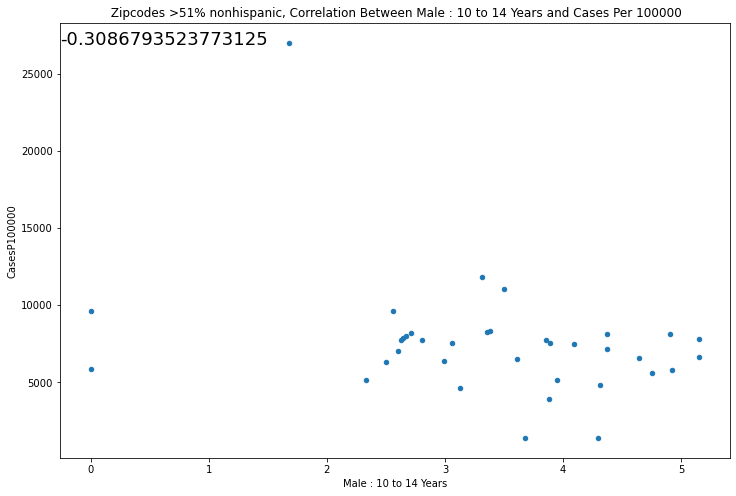

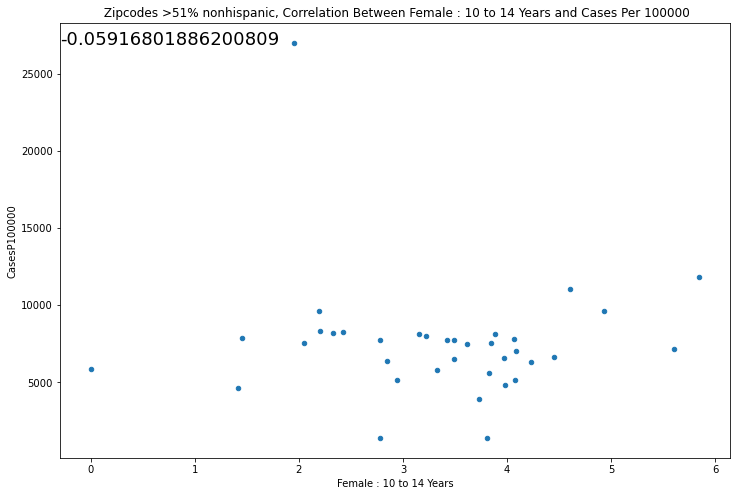

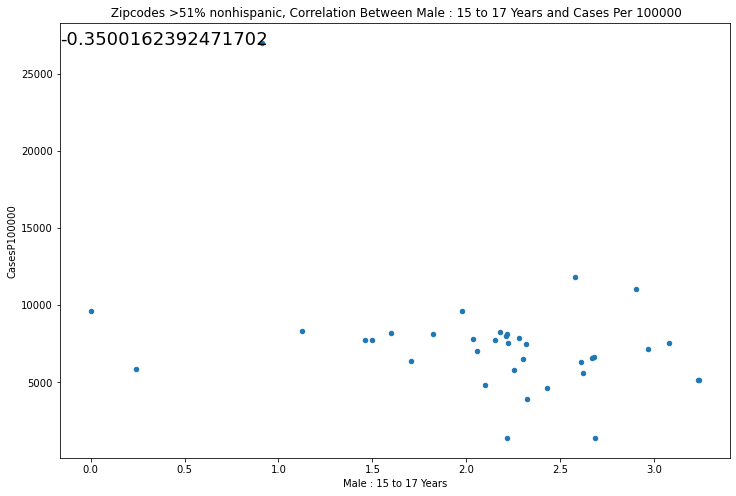

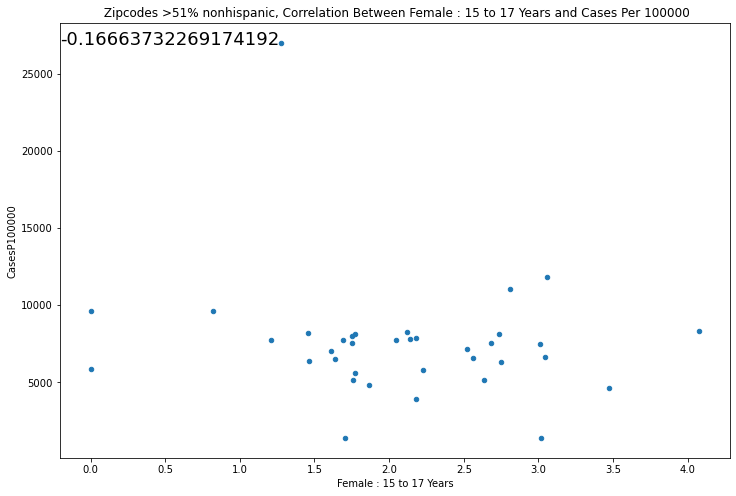

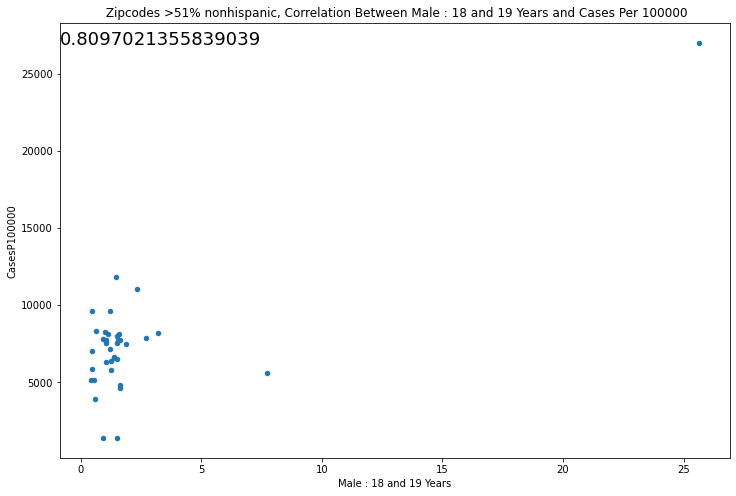

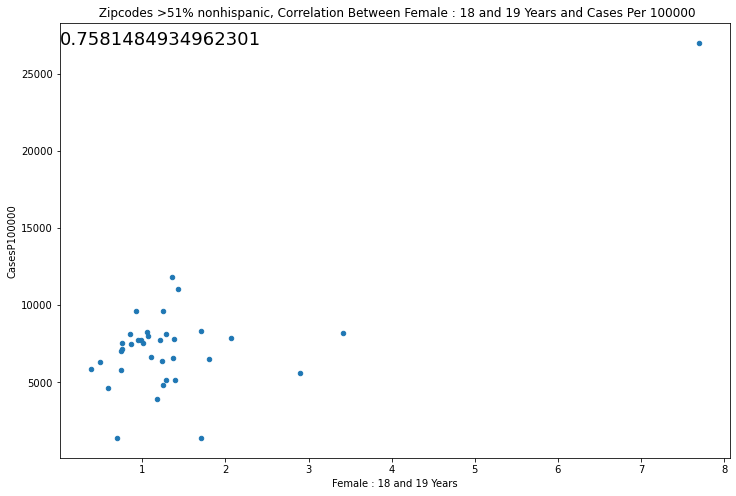

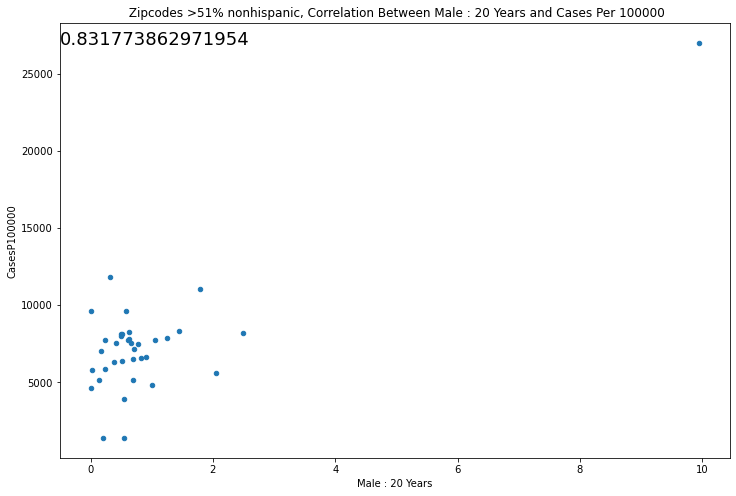

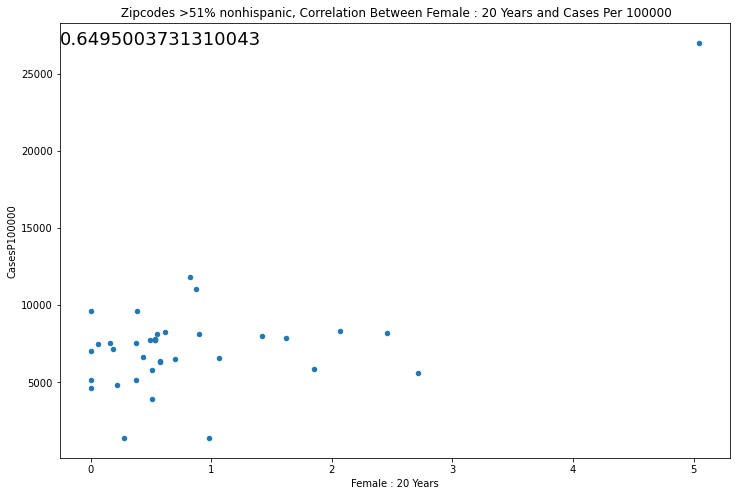

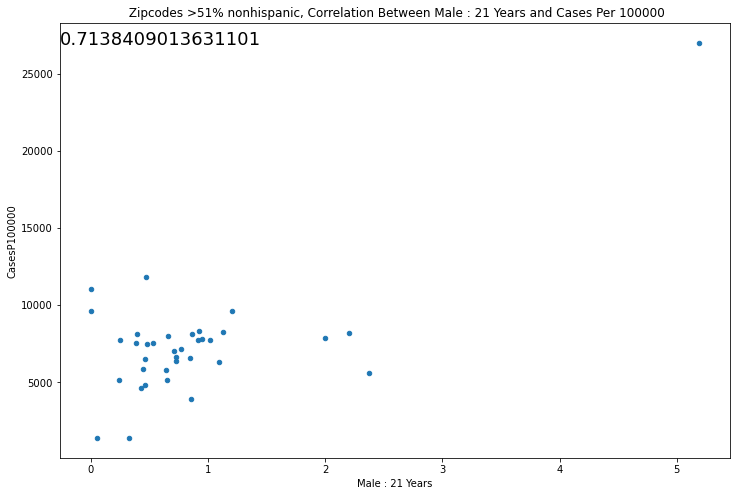

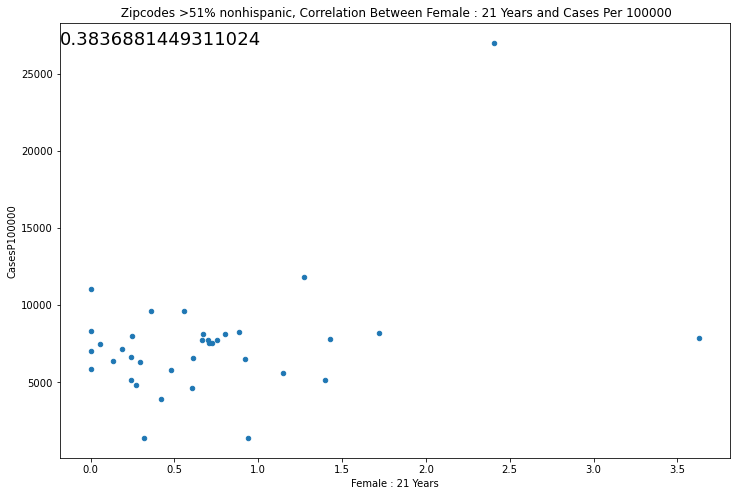

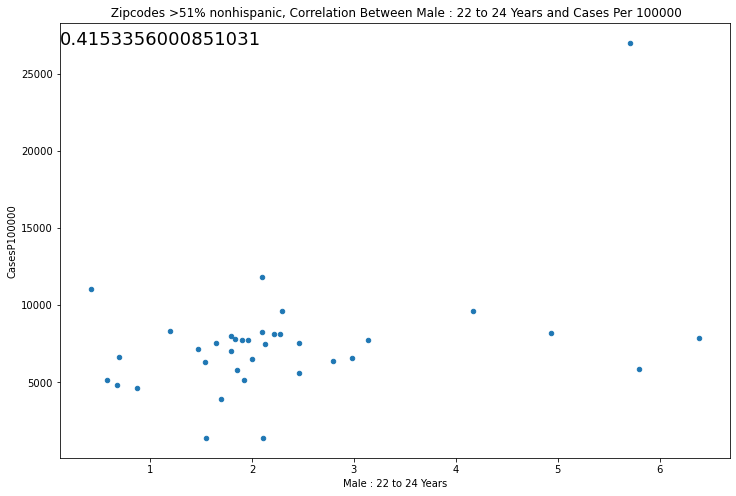

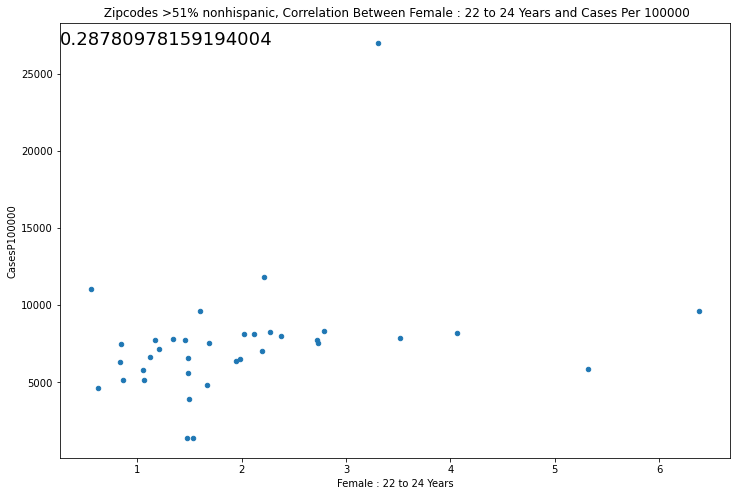

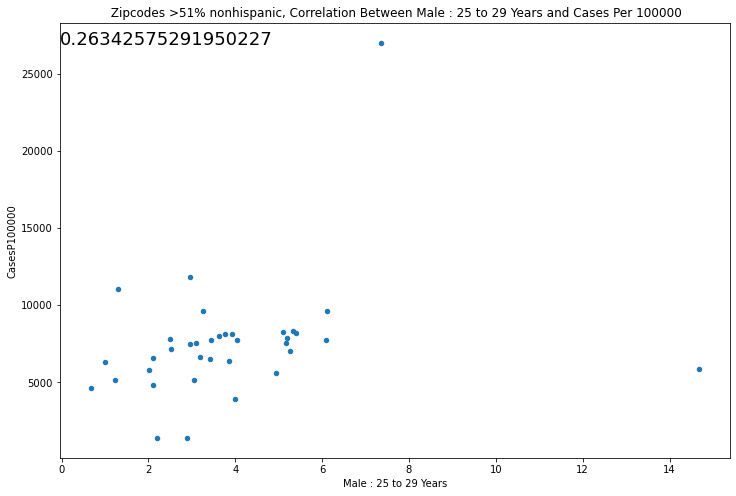

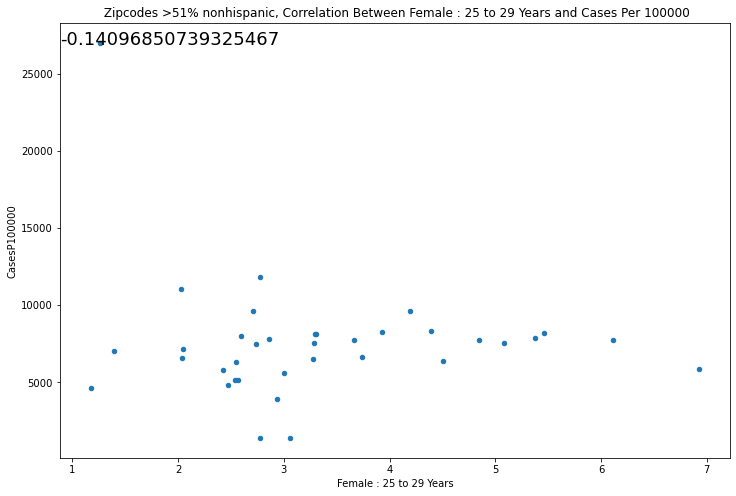

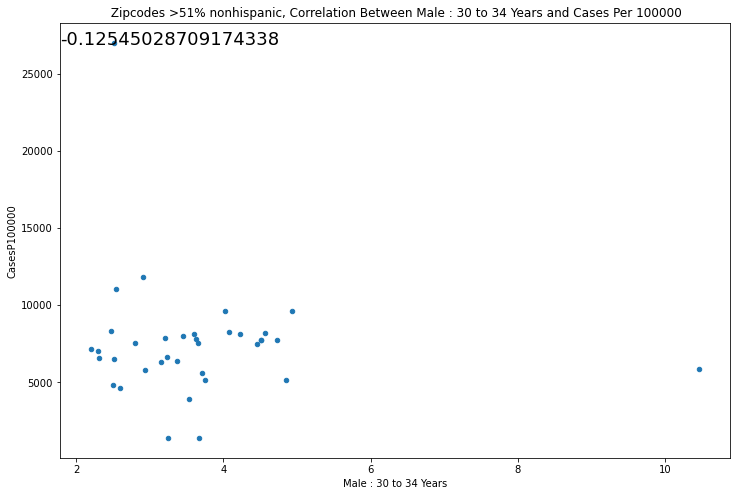

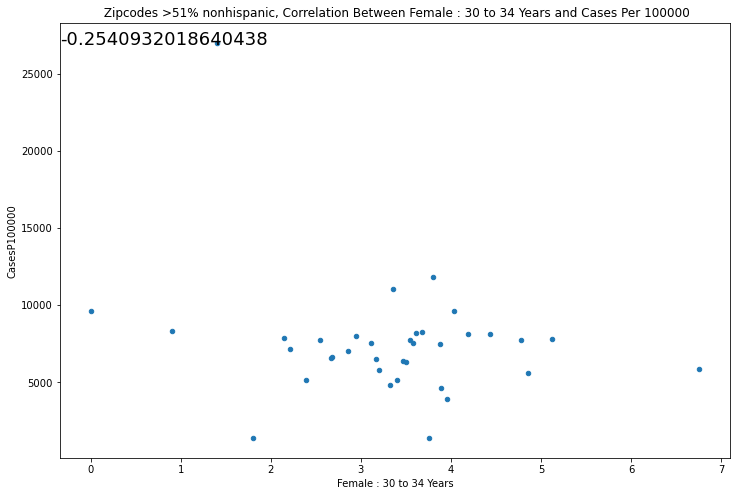

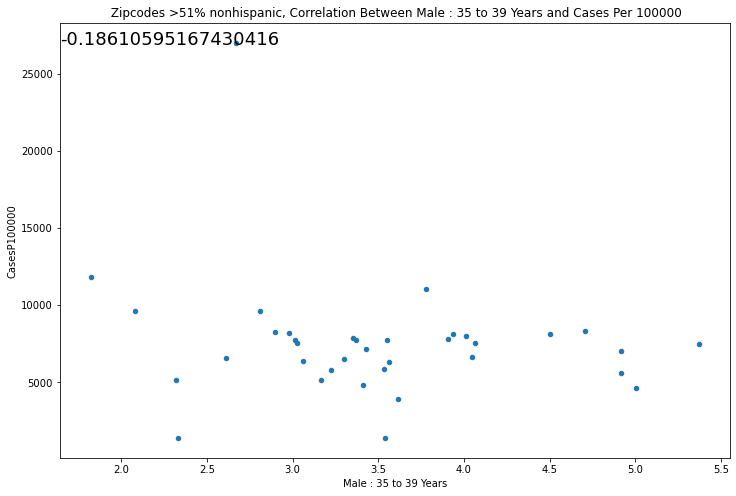

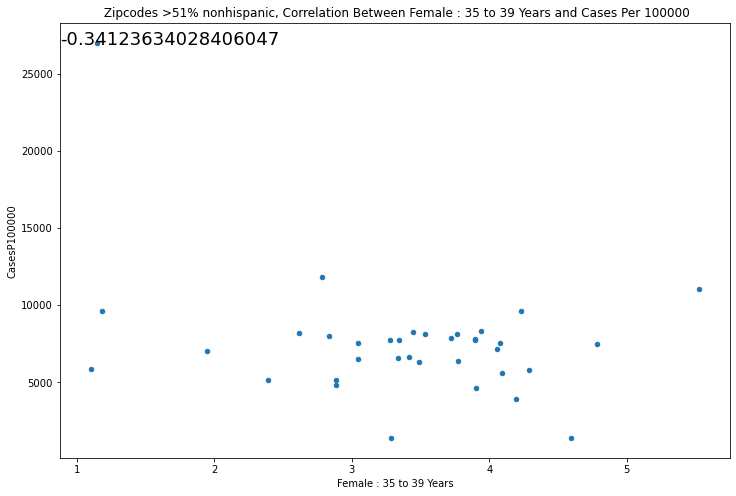

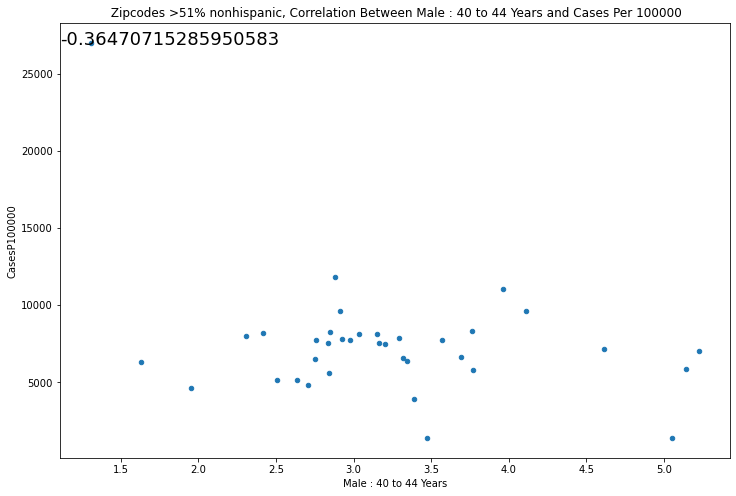

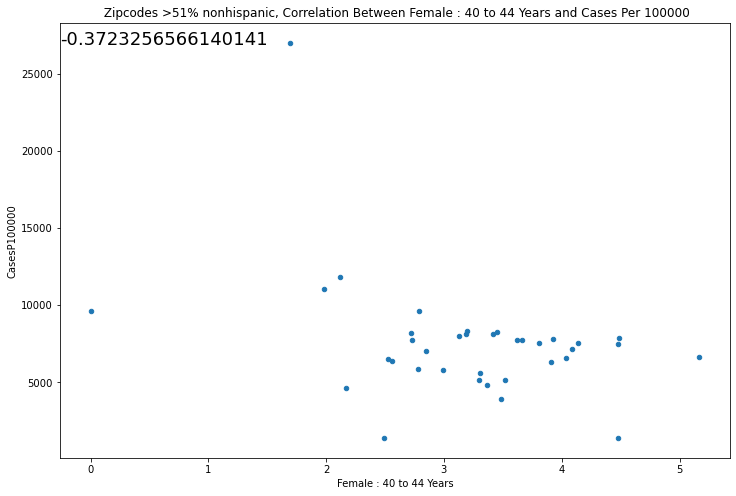

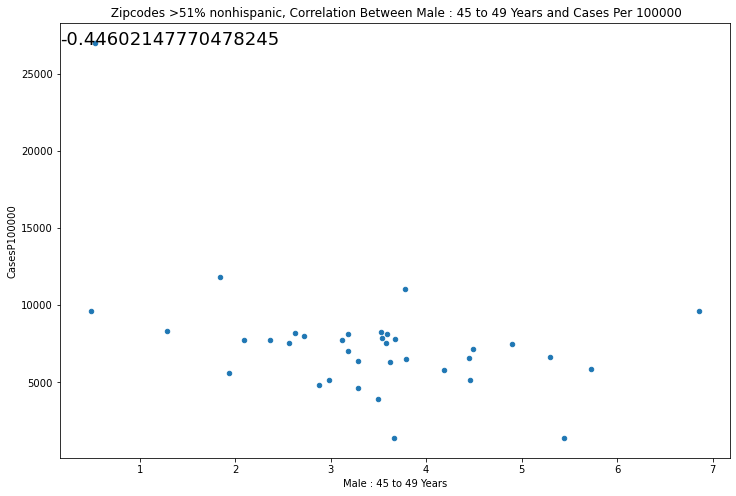

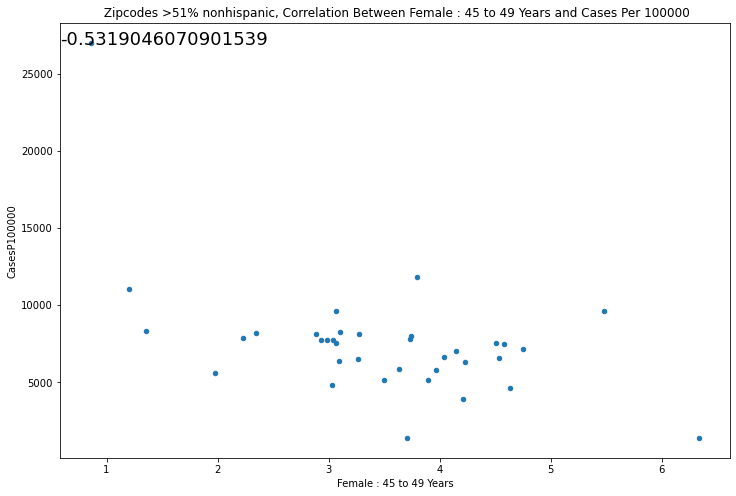

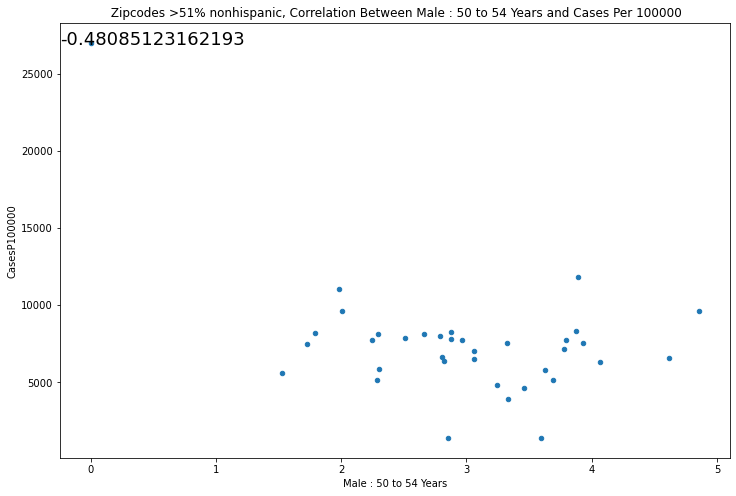

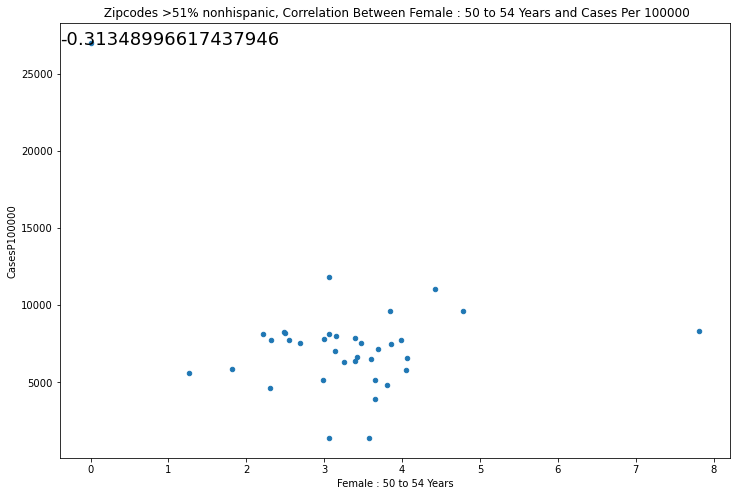

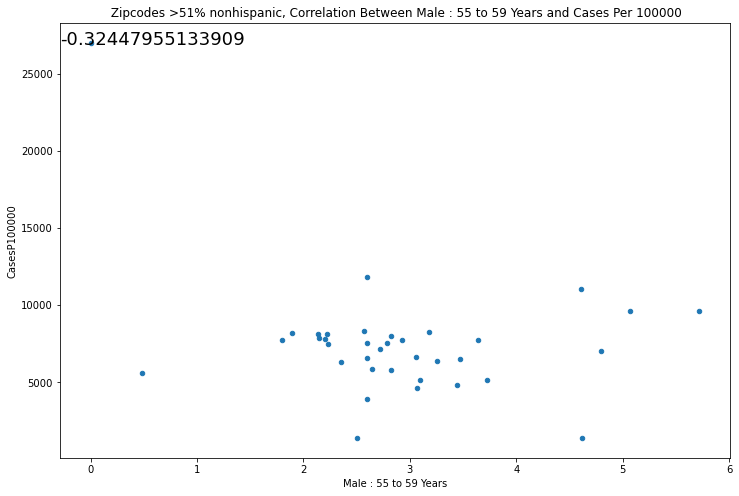

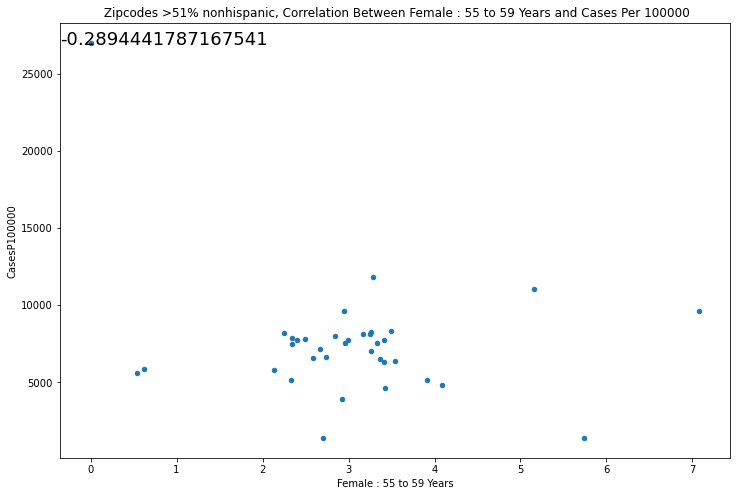

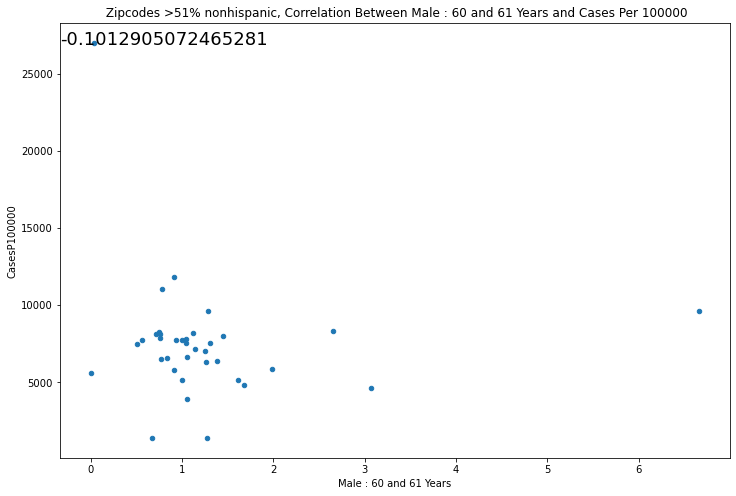

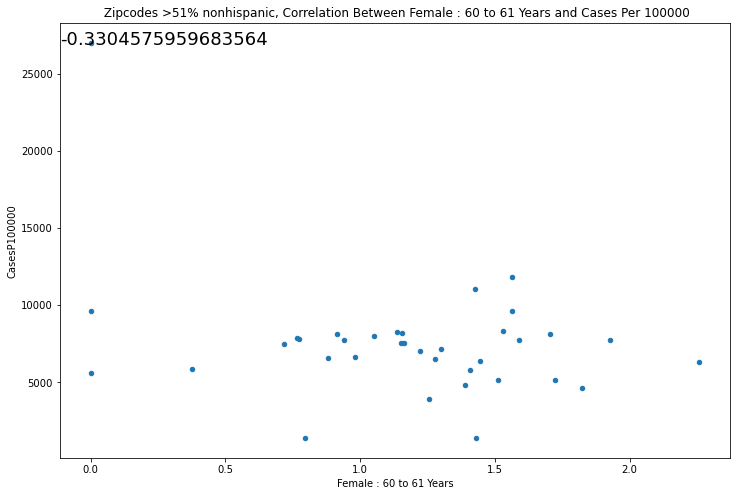

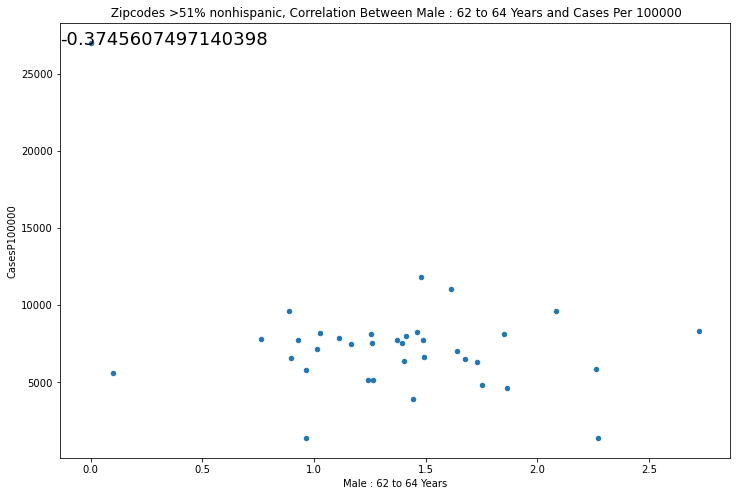

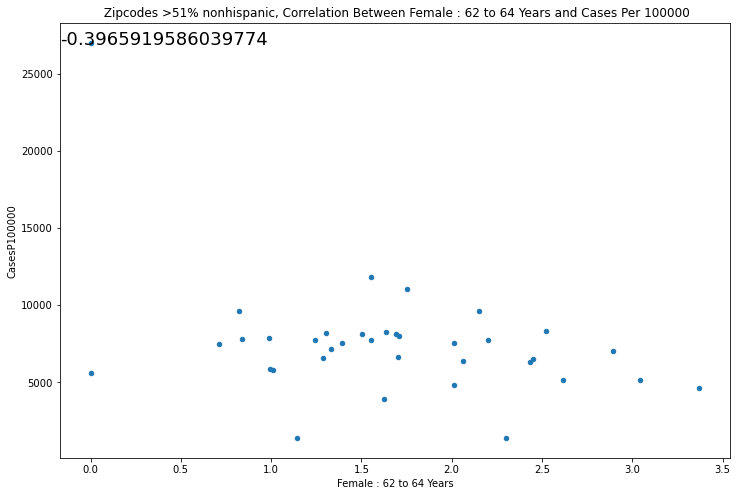

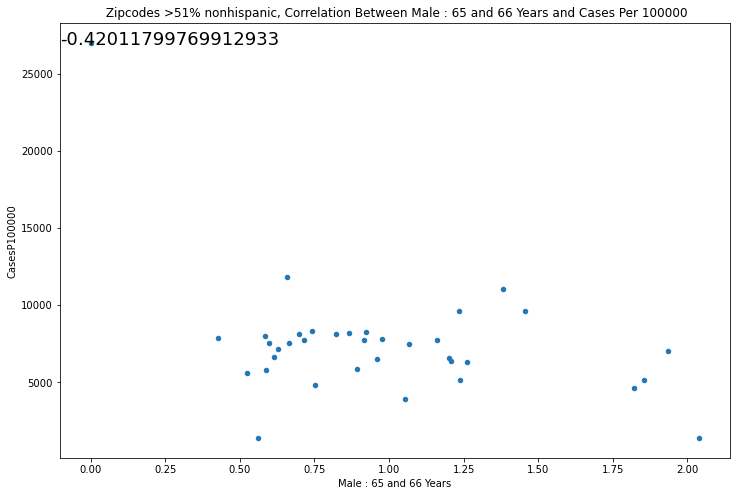

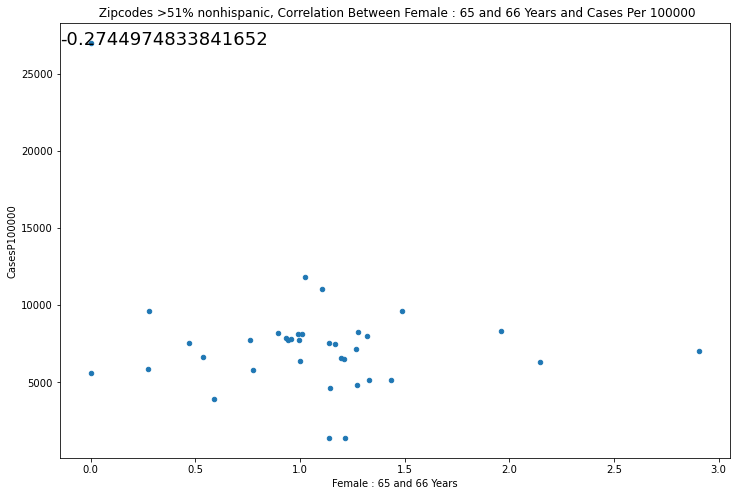

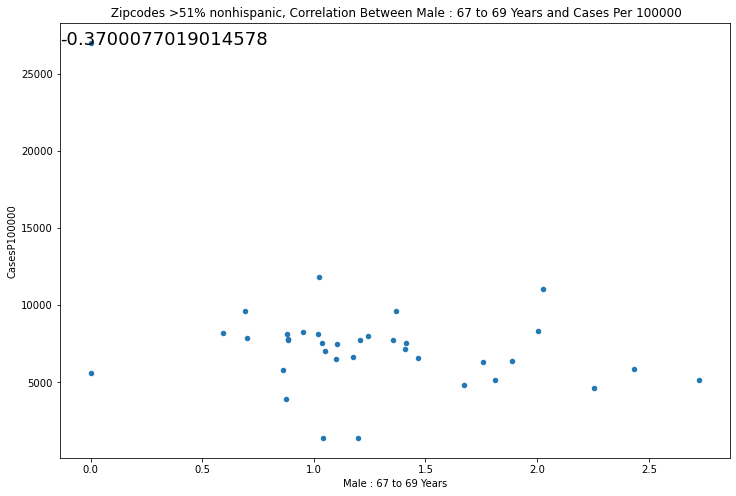

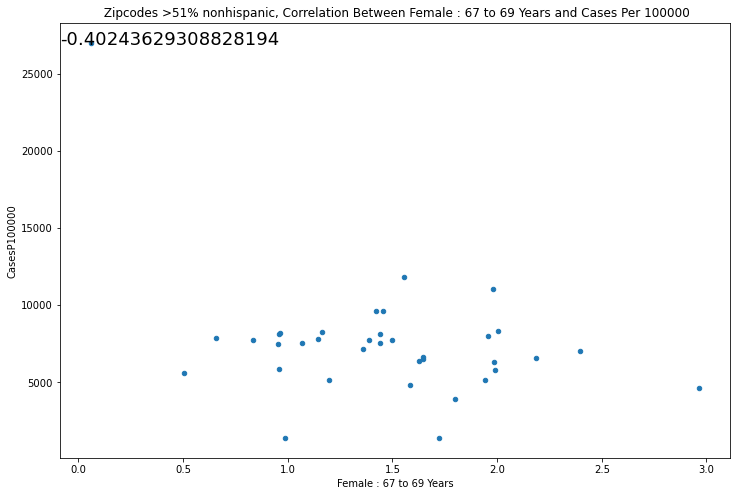

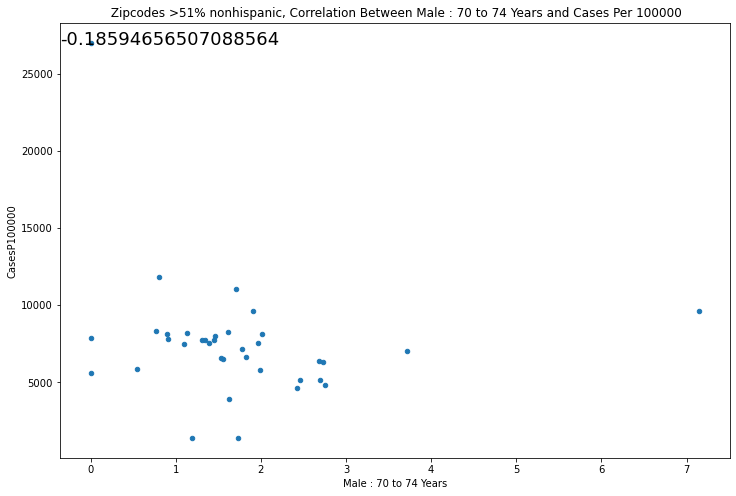

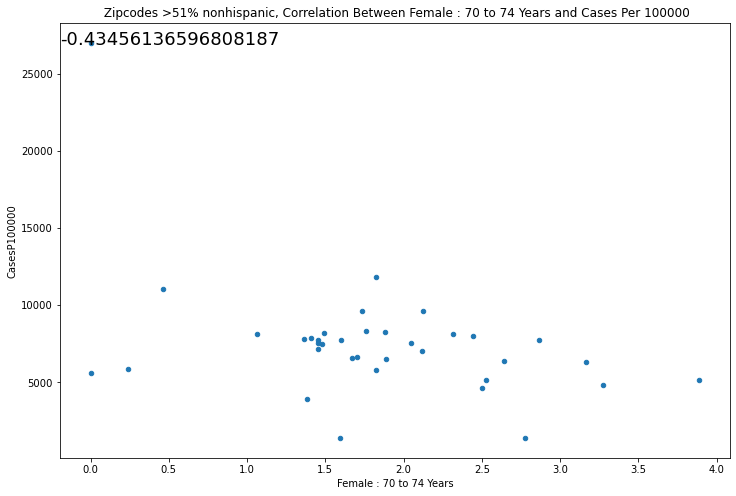

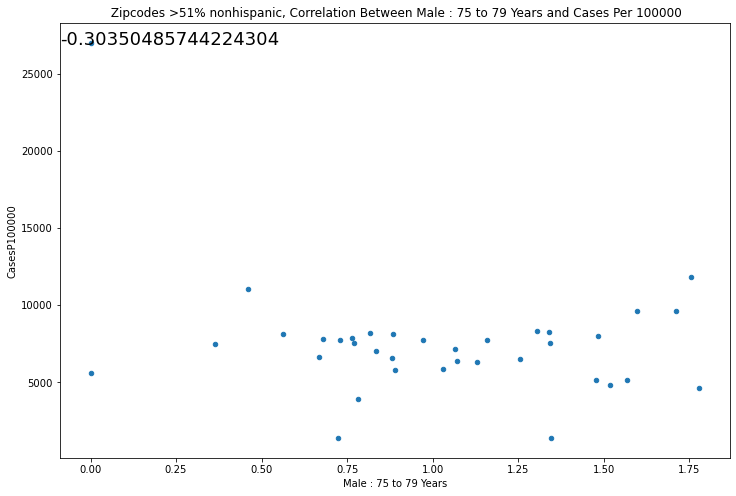

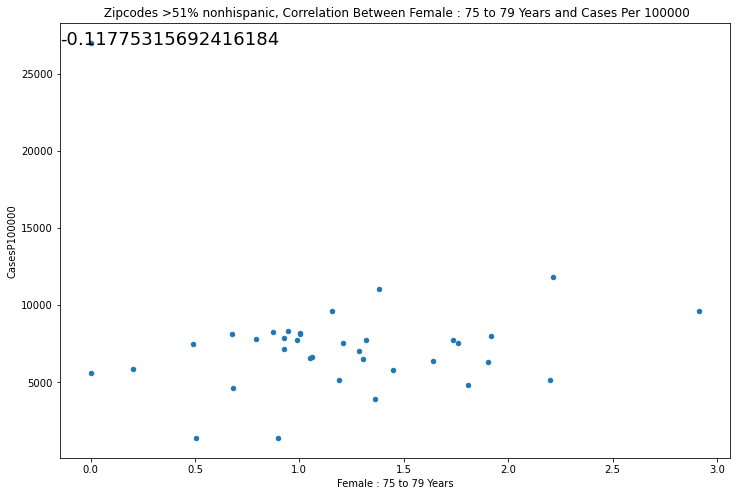

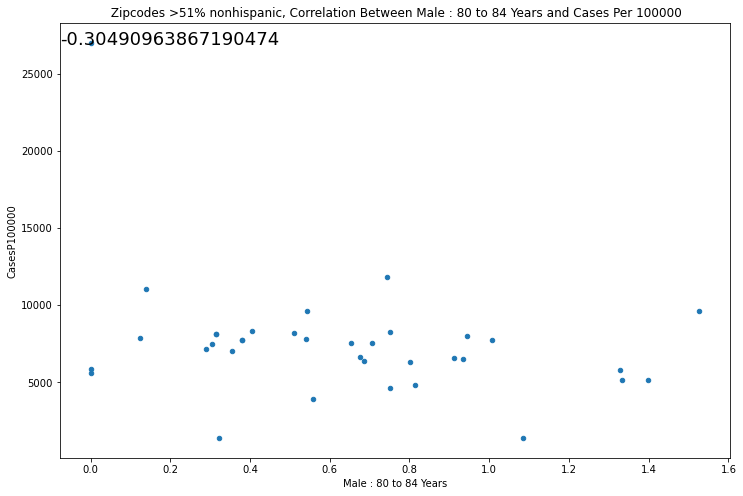

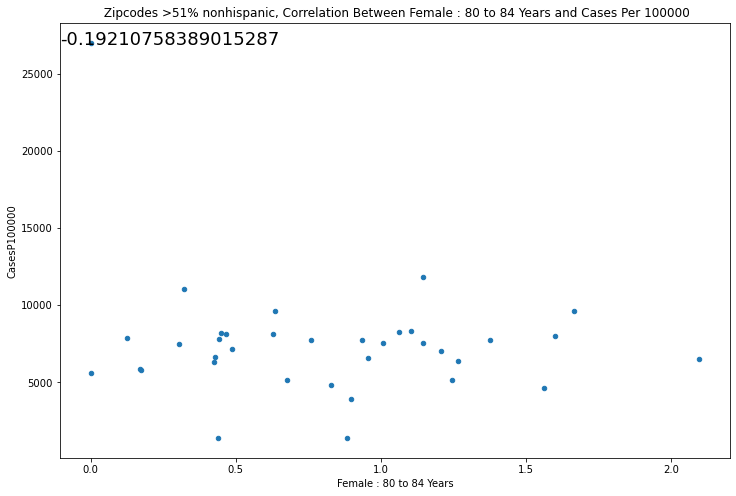

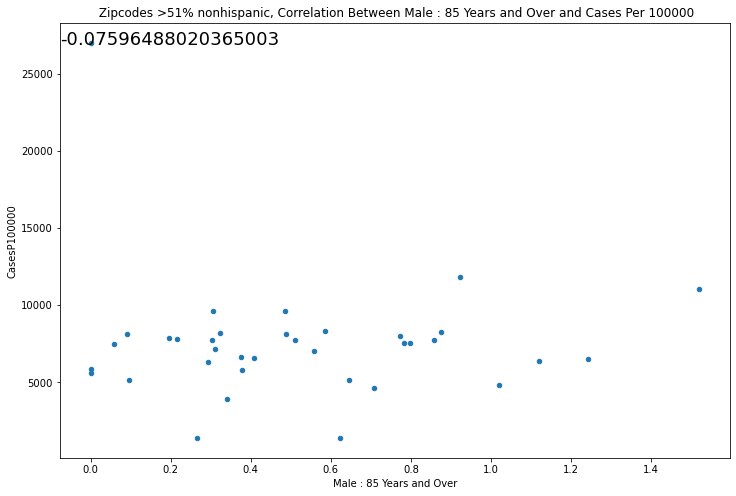

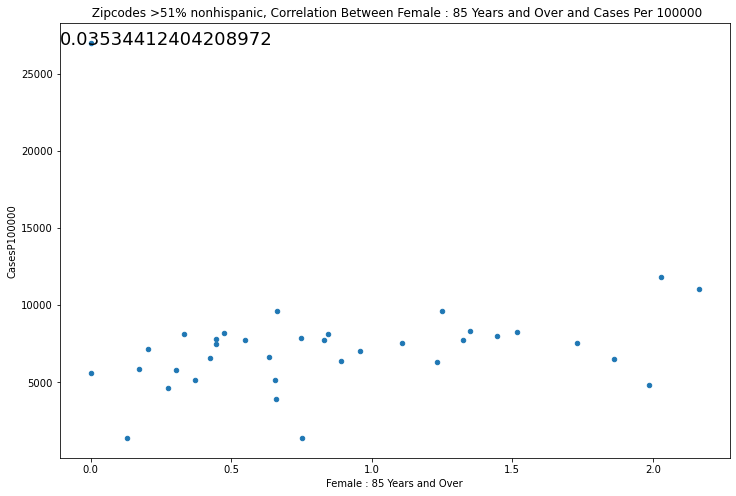

In [22]:
# Scatter plots for majority non hispanic zipcodes
age_list =["Total Male", "Total Female", "Male : Under 5 Years", "Female : Under 5 Years", "Male : 5 to 9 Years", "Female : 5 to 9 Years",
            "Male : 10 to 14 Years", "Female : 10 to 14 Years", "Male : 15 to 17 Years", "Female : 15 to 17 Years", "Male : 18 and 19 Years", "Female : 18 and 19 Years",
            "Male : 20 Years", "Female : 20 Years", "Male : 21 Years", "Female : 21 Years", "Male : 22 to 24 Years",
            "Female : 22 to 24 Years", "Male : 25 to 29 Years", "Female : 25 to 29 Years", "Male : 30 to 34 Years",
            "Female : 30 to 34 Years", "Male : 35 to 39 Years", "Female : 35 to 39 Years", "Male : 40 to 44 Years",
            "Female : 40 to 44 Years", "Male : 45 to 49 Years", "Female : 45 to 49 Years", "Male : 50 to 54 Years",
            "Female : 50 to 54 Years", "Male : 55 to 59 Years", "Female : 55 to 59 Years", "Male : 60 and 61 Years",
             "Female : 60 to 61 Years", "Male : 62 to 64 Years", "Female : 62 to 64 Years", "Male : 65 and 66 Years",
            "Female : 65 and 66 Years", "Male : 67 to 69 Years", "Female : 67 to 69 Years", "Male : 70 to 74 Years",
            "Female : 70 to 74 Years", "Male : 75 to 79 Years", "Female : 75 to 79 Years", "Male : 80 to 84 Years",
            "Female : 80 to 84 Years", "Male : 85 Years and Over", "Female : 85 Years and Over"]
for element in age_list:
    agepercentage_majnhf.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f' Zipcodes >51% nonhispanic, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(agepercentage_majnhf[element],
                                 agepercentage_majnhf["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')